In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, argrelmin, argrelextrema
import csv
import bvhsdk
from scipy.stats import skew

In [2]:
path_fromtext = './save/default_vad_wavlm_gt/samples_default_vad_wavlm_gt_000600000_seed10'
path_novad = './save/default_wavlm2/samples_default_wavlm2_000600000_seed10'
path_vad = './save/default_vad_wavlm2/samples_default_vad_wavlm2_000600000_seed10'
path_default = './save/default/official_samples_default_000600000_seed10'
audio = './dataset/Genea2023/tst/main-agent/audio16k_npy'
vadp = './dataset/Genea2023/tst/main-agent/vad'
tsvp = './dataset/Genea2023/tst/main-agent/tsv'

audiogt = './dataset/Genea2023/val/main-agent/audio16k_npy'
motiongt6d = './dataset/Genea2023/val/main-agent/motion_npy_rot6dpos'
motiongt = './dataset/Genea2023/val/main-agent/motion_npy_rotpos'
tsvgt = './dataset/Genea2023/val/main-agent/tsv'
vadgt = './dataset/Genea2023/val/main-agent/vad'
meangt = './dataset/Genea2023/trn/main-agent/rotpos_Mean.npy'

audiotrn = './dataset/Genea2023/trn/main-agent/audio16k_npy'
motiontrn6d = './dataset/Genea2023/trn/main-agent/motion_npy_rot6dpos'
motiontrn = './dataset/Genea2023/trn/main-agent/motion_npy_rotpos'
tsvtrn = './dataset/Genea2023/trn/main-agent/tsv'
vadtrn = './dataset/Genea2023/trn/main-agent/vad'
meantrn = './dataset/Genea2023/trn/main-agent/rotpos_Mean.npy'

#body_world,b_root,b_spine0,b_spine1,b_spine2,b_spine3,b_neck0,b_head,b_head_null,b_l_eye,b_r_eye,b_jaw,b_jaw_null,b_teeth,b_tongue0,b_tongue1,b_tongue2,b_tongue3,b_tongue4,b_l_tongue4_1,b_r_tongue4_1,b_l_tongue3_1,b_r_tongue3_1,b_l_tongue2_1,b_r_tongue2_1,b_r_tongue1_1,b_l_tongue1_1,b_r_shoulder,p_r_scap,b_r_arm,b_r_arm_twist,b_r_forearm,b_r_wrist_twist,b_r_wrist,b_r_index1,b_r_index2,b_r_index3,b_r_ring1,b_r_ring2,b_r_ring3,b_r_middle1,b_r_middle2,b_r_middle3,b_r_pinky1,b_r_pinky2,b_r_pinky3,b_r_thumb0,b_r_thumb1,b_r_thumb2,b_r_thumb3,b_l_shoulder,p_l_delt,p_l_scap,b_l_arm,b_l_arm_twist,b_l_forearm,b_l_wrist_twist,b_l_wrist,b_l_thumb0,b_l_thumb1,b_l_thumb2,b_l_thumb3,b_l_index1,b_l_index2,b_l_index3,b_l_middle1,b_l_middle2,b_l_middle3,b_l_ring1,b_l_ring2,b_l_ring3,b_l_pinky1,b_l_pinky2,b_l_pinky3,p_navel,b_r_upleg,b_r_leg,b_r_foot_twist,b_r_foot,b_l_upleg,b_l_leg,b_l_foot_twist,b_l_foot=0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
alljoints = {'body_world':0,'b_root':1,'b_spine0':2,'b_spine1':3,'b_spine2':4,'b_spine3':5,'b_neck0':6,'b_head':7,'b_head_null':8,'b_l_eye':9,'b_r_eye':10,'b_jaw':11,'b_jaw_null':12,'b_teeth':13,'b_tongue0':14,'b_tongue1':15,'b_tongue2':16,'b_tongue3':17,'b_tongue4':18,'b_l_tongue4_1':19,'b_r_tongue4_1':20,'b_l_tongue3_1':21,'b_r_tongue3_1':22,'b_l_tongue2_1':23,'b_r_tongue2_1':24,'b_r_tongue1_1':25,'b_l_tongue1_1':26,'b_r_shoulder':27,'p_r_scap':28,'b_r_arm':29,'b_r_arm_twist':30,'b_r_forearm':31,'b_r_wrist_twist':32,'b_r_wrist':33,'b_r_index1':34,'b_r_index2':35,'b_r_index3':36,'b_r_ring1':37,'b_r_ring2':38,'b_r_ring3':39,'b_r_middle1':40,'b_r_middle2':41,'b_r_middle3':42,'b_r_pinky1':43,'b_r_pinky2':44,'b_r_pinky3':45,'b_r_thumb0':46,'b_r_thumb1':47,'b_r_thumb2':48,'b_r_thumb3':49,'b_l_shoulder':50,'p_l_delt':51,'p_l_scap':52,'b_l_arm':53,'b_l_arm_twist':54,'b_l_forearm':55,'b_l_wrist_twist':56,'b_l_wrist':57,'b_l_thumb0':58,'b_l_thumb1':59,'b_l_thumb2':60,'b_l_thumb3':61,'b_l_index1':62,'b_l_index2':63,'b_l_index3':64,'b_l_middle1':65,'b_l_middle2':66,'b_l_middle3':67,'b_l_ring1':68,'b_l_ring2':69,'b_l_ring3':70,'b_l_pinky1':71,'b_l_pinky2':72,'b_l_pinky3':73,'p_navel':74,'b_r_upleg':75,'b_r_leg':76,'b_r_foot_twist':77,'b_r_foot':78,'b_l_upleg':79,'b_l_leg':80,'b_l_foot_twist':81,'b_l_foot':82}

def getjoints():
    #toget = ['b_r_shoulder','b_r_arm','b_r_arm_twist','b_r_forearm','b_r_wrist_twist','b_r_wrist',
    #       'b_l_shoulder','b_l_arm','b_l_arm_twist','b_l_forearm','b_l_wrist_twist','b_l_wrist']
    toget = ['b_r_forearm','b_l_forearm']
    return {k:alljoints[k] for k in alljoints if k in toget}

def getaudio(audiofolder):
    print(os.listdir(audiofolder))

def getmotion(motionfolder):
    print(os.listdir(motionfolder))


def getgt(ap, mp, vp, tp, fps = 30, rot=True):
    af, mf, vf, tf = os.listdir(ap), os.listdir(mp), os.listdir(vp), os.listdir(tp)
    mf = [f for f in mf if os.path.isfile(os.path.join(mp,f))]
    assert len(af) == len(mf)
    ins, outs, tins, touts = [], [], [], []
    velin, velout, veltin, veltout =  [], [], [], []
    histogram_vel_in, histogram_vel_out = [], []
    histogram_vel_tin, histogram_vel_tout = [], []
    meantrn = np.load(meangt)
    
    for i, (a, m, v, t) in enumerate(zip(af, mf, vf, tf)):
        assert a == m, "{} != {}".format(a,m)
        assert m == v, "{} != {}".format(m,v)
        assert v[:-4] == t[:-4], "{} != {}".format(v,t)
        print(a)
        afull = os.path.join(ap, a)
        aarray = np.load(afull)

        mfull = os.path.join(mp, m)
        marray = np.load(mfull)
        joints = getjoints() 

        vfull = os.path.join(vp, v)
        vad = np.load(vfull)

        tfull = os.path.join(tp, t)
        with open(tfull) as file:
            reader = csv.reader(file, delimiter='\t')
            tsv = [ [float(word[0])*fps, float(word[1])*fps, word[2]] for word in reader]
        times = [(np.floor(word[0]).astype(int), np.ceil(word[1]).astype(int)) for word in tsv]
        tvad = np.zeros(marray.shape[0])
        for (i, f) in times:
            tvad[i:f] = 1
        
        # get metrics
        take_ins, take_outs, take_tins, take_touts = 0,0,0,0
        take_velins, take_velouts, take_veltins, take_veltouts, lens = 0,0,0,0, []
        
        for jointname in joints:
            #print(jointname)
            index = joints[jointname]
            if not rot:
                vec = np.arange(index*6+3, index*6+6)
                euclidean_position, kinetic, near_zero_local_mins = motionbeats(marray[:,vec])
                joint_in, joint_out, joint_tin, joint_tout = beastandvad(near_zero_local_mins, vad, tvad)
                
                take_ins += joint_in
                take_outs += joint_out
                take_tins += joint_tin
                take_touts += joint_tout
                
                joint_in, joint_out, joint_tin, joint_tout, framelen = motionvel(marray[:,vec], kinetic, vad, tvad)
            else:
                
                vec = marray[:,np.arange(index*6, index*6+3)]
                #mean = np.mean(vec, axis = 0)
                mean = meantrn[np.arange(index*6, index*6+3)]
                vec -= mean
                vec = vec[:-1] - vec[1:]
                vec = np.absolute(vec)
                vec = np.sum(vec, axis=-1)
                kinetic = vec
                joint_in, joint_out, joint_tin, joint_tout, framelen = motionvel(None, kinetic, vad, tvad)
                
            
            take_velins += joint_in/framelen
            take_velouts += joint_out/framelen
            take_veltins += joint_tin/framelen
            take_veltouts += joint_tout/framelen
            #print('VAD')
            #print(joint_in, joint_out)
            #print('Text VAD')
            #print(joint_tin, joint_tout)
            
            histogram_vel_in, histogram_vel_out, \
            histogram_vel_tin, histogram_vel_toutcomposehist = composehist(kinetic, vad, tvad,histogram_vel_in, 
                                                                           histogram_vel_out,
                                                                           histogram_vel_tin,
                                                                           histogram_vel_tout)
        
        ins.append(np.mean(take_ins))
        outs.append(np.mean(take_outs))
        tins.append(np.mean(take_tins))
        touts.append(np.mean(take_touts))
        
        velin.append(np.mean(take_velins))
        velout.append(np.mean(take_velouts))
        veltin.append(np.mean(take_veltins))
        veltout.append(np.mean(take_veltouts))
        lens.append(framelen)
        
    lens = np.asarray(lens) 
    velin = np.asarray(velin)/np.sum(lens)
    velout = np.asarray(velout)/np.sum(lens)
    veltin = np.asarray(veltin)/np.sum(lens)
    veltout = np.asarray(veltout)/np.sum(lens)
    
    
    print('Total VAD')
    print(np.sum(ins), np.sum(outs))
    print(np.sum(velin*lens), np.sum(velout*lens))
    print('Total Text VAD')
    print(np.sum(tins), np.sum(touts))
    print(np.sum(veltin*lens), np.sum(veltout*lens))
        
    return aarray, marray, joints, vad, tsv, tvad, (histogram_vel_in, histogram_vel_out,histogram_vel_tin, histogram_vel_toutcomposehist)

def composehist(kinetic, vad, tvad, hi, ho, hit, hot, epsilon=0):
    for i, value in enumerate(kinetic):
        if value > epsilon:
            if vad[i] == 1:
                hi.append(value)
            else:
                ho.append(value)
            if tvad[i] == 1:
                hit.append(value)
            else:
                hot.append(value)
    return hi, ho, hit, hot

def audiorms(aarray, sr=16000, fps=30):
    return librosa.feature.rms(y=aarray, hop_length = int(sr/fps))

def motionvel(marray, kinetic, vad, tvad):
    ins, out, tin, tout = 0, 0, 0, 0
    for i, value in enumerate(kinetic):
        if vad[i] == 1:
            ins += value
        else:
            out += value
        if tvad[i] == 1:
            tin += value
        else:
            tout += value
    return ins, out, tin, tout, kinetic.shape[0]
    

def motionbeats(marray, epsilon=0.1):
    euclidean_position = np.linalg.norm(marray, axis=-1)
    kinetic = np.square(savgol_filter(euclidean_position, 9, 3, axis=0, deriv=1))
    local_mins = argrelextrema(kinetic, np.less)
    near_zero_local_mins = []
    for local_min in local_mins[0]:
        if kinetic[local_min] <= epsilon:
            near_zero_local_mins.append(local_min)
    return euclidean_position, kinetic, np.asarray(near_zero_local_mins)

def beastandvad(near_zero_local_mins, vad, tvad):
    ins, out, tin, tout = [], [], [], []
    for i in near_zero_local_mins:
        if vad[i] == 1:
            ins.append(i)
        else:
            out.append(i)
        if tvad[i] == 1:
            tin.append(i)
        else:
            tout.append(i)
    return len(ins), len(out), len(tin), len(tout)

def bvh2marray(anim, jointname):
    joint = anim.getJoint(jointname)
    assert joint
    marray = np.empty(shape=(anim.frames,3))
    for frame in range(anim.frames):
        marray[frame] = joint.getPosition(frame)
    return marray
        
def bvh2rotarray(anim, jointname):
    joint = anim.getJoint(jointname)
    assert joint
    marray = np.empty(shape=(anim.frames,3))
    for frame in range(anim.frames):
        marray[frame] = joint.rotation[frame]
    return marray

def getmodel(ap, mp, vp, tp, fps = 30, rot=True):
    af, mf, vf, tf = os.listdir(ap), os.listdir(mp), os.listdir(vp), os.listdir(tp)
    assert os.path.isdir(os.path.join(path_fromtext, 'metrics')), "{} folder not found".format(os.path.join(path_fromtext, 'metrics'))
    bvhf = [f for f in mf if f.endswith('.bvh')]
    assert 'results.npy' in mf
    assert len(af) == len(bvhf)
    ins, outs, tins, touts = [], [], [], []
    velin, velout, veltin, veltout =  [], [], [], []
    histogram_vel_in, histogram_vel_out = [], []
    histogram_vel_tin, histogram_vel_tout = [], []
    meanpath = os.path.join(mp, 'metrics/mean.npy')
    if not os.path.exists(meanpath):
        mean = np.zeros(shape=(list(alljoints.values())[-1]*6))
        frames = []
        print('mean.npy file not found. Computing mean of selected joints from getjoints() (3d rot representation)')
        joints = [i for i in getjoints().keys()]
        for m in bvhf:
            print(m)
            mfull = os.path.join(mp, m)
            anim = bvhsdk.ReadFile(mfull)
            frames.append(anim.frames)
            for joint in joints:
                index = getjoints()[joint]
                rotarray = bvh2rotarray(anim, joint)
                mean[np.arange(index*6, index*6+3)] += np.sum(rotarray, axis=0)
        mean = mean/np.sum(np.array(frames))
        np.save(meanpath, mean)
    
    means = np.load(meanpath)
    for i, (a, m, v, t) in enumerate(zip(af, bvhf, vf, tf)):
        print(a)
        assert a[:-4] == m[:-4], "{} != {}".format(a,m)
        assert m[:-4] == v[:-4], "{} != {}".format(m,v)
        assert v[:-4] == t[:-4], "{} != {}".format(v,t)
        
        mfull = os.path.join(mp, m)
        anim = bvhsdk.ReadFile(mfull)
        
        afull = os.path.join(ap, a)
        aarray = np.load(afull)
        
        vfull = os.path.join(vp, v)
        vad = np.load(vfull)

        tfull = os.path.join(tp, t)
        with open(tfull) as file:
            reader = csv.reader(file, delimiter='\t')
            tsv = [ [float(word[0])*fps, float(word[1])*fps, word[2]] for word in reader]
        times = [(np.floor(word[0]).astype(int), np.ceil(word[1]).astype(int)) for word in tsv]
        tvad = np.zeros(anim.frames)
        for (i, f) in times:
            tvad[i:f] = 1
            
        # get metrics
        take_ins, take_outs, take_tins, take_touts = 0,0,0,0
        take_velins, take_velouts, take_veltins, take_veltouts, lens = 0,0,0,0, []
        joints = [i for i in getjoints().keys()]
        
        for joint in joints:
            index = getjoints()[joint]
            if not rot:
                marray = bvh2marray(anim, joint)
                euclidean_position, kinetic, near_zero_local_mins = motionbeats(marray)
                joint_in, joint_out, joint_tin, joint_tout = beastandvad(near_zero_local_mins, vad, tvad)
                
                take_ins += joint_in
                take_outs += joint_out
                take_tins += joint_tin
                take_touts += joint_tout
                
                joint_in, joint_out, joint_tin, joint_tout, framelen = motionvel(marray, kinetic, vad, tvad)
                
            else:
                rotarray = bvh2rotarray(anim, joint)
                #print('Vec')
                #print(rotarray)
                #mean = np.mean(rotarray, axis = 0)
                mean = means[np.arange(index*6, index*6+3)]
                #print('mean')
                #print(mean)
                rotarray -= mean
                #print(rotarray.shape)
                rotarray = rotarray[:-1] - rotarray[1:]
                rotarray = np.absolute(rotarray)
                #print('vec again')
                #print(rotarray)
                rotarray = np.sum(rotarray, axis=-1)
                #print('last vec')
                #print(rotarray)
                kinetic = rotarray
                marray = rotarray
                joint_in, joint_out, joint_tin, joint_tout, framelen = motionvel(None, kinetic, vad, tvad)
            
            take_velins += joint_in/framelen
            take_velouts += joint_out/framelen
            take_veltins += joint_tin/framelen
            take_veltouts += joint_tout/framelen
            
            histogram_vel_in, histogram_vel_out, \
            histogram_vel_tin, histogram_vel_toutcomposehist = composehist(kinetic, vad, tvad,histogram_vel_in, 
                                                                           histogram_vel_out,
                                                                           histogram_vel_tin,
                                                                           histogram_vel_tout)

        ins.append(np.mean(take_ins))
        outs.append(np.mean(take_outs))
        tins.append(np.mean(take_tins))
        touts.append(np.mean(take_touts))
        
        velin.append(np.mean(take_velins))
        velout.append(np.mean(take_velouts))
        veltin.append(np.mean(take_veltins))
        veltout.append(np.mean(take_veltouts))
        lens.append(framelen)
        
    lens = np.asarray(lens) 
    velin = np.asarray(velin)/np.sum(lens)
    velout = np.asarray(velout)/np.sum(lens)
    veltin = np.asarray(veltin)/np.sum(lens)
    veltout = np.asarray(veltout)/np.sum(lens)
    
    print('Total VAD')
    print(np.sum(ins), np.sum(outs))
    print(np.sum(velin*lens), np.sum(velout*lens))
    print('Total Text VAD')
    print(np.sum(tins), np.sum(touts))
    print(np.sum(veltin*lens), np.sum(veltout*lens))
        
    return aarray, marray, joints, vad, tsv, tvad, (histogram_vel_in, histogram_vel_out,histogram_vel_tin, histogram_vel_toutcomposehist)
            

In [13]:
teste = np.load(os.path.join(motiongt, 'metrics/r_histogram_vel_in.npy'))

In [11]:
mean = np.load(meangt)

1.1882981444487255
1.0622941236877237


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


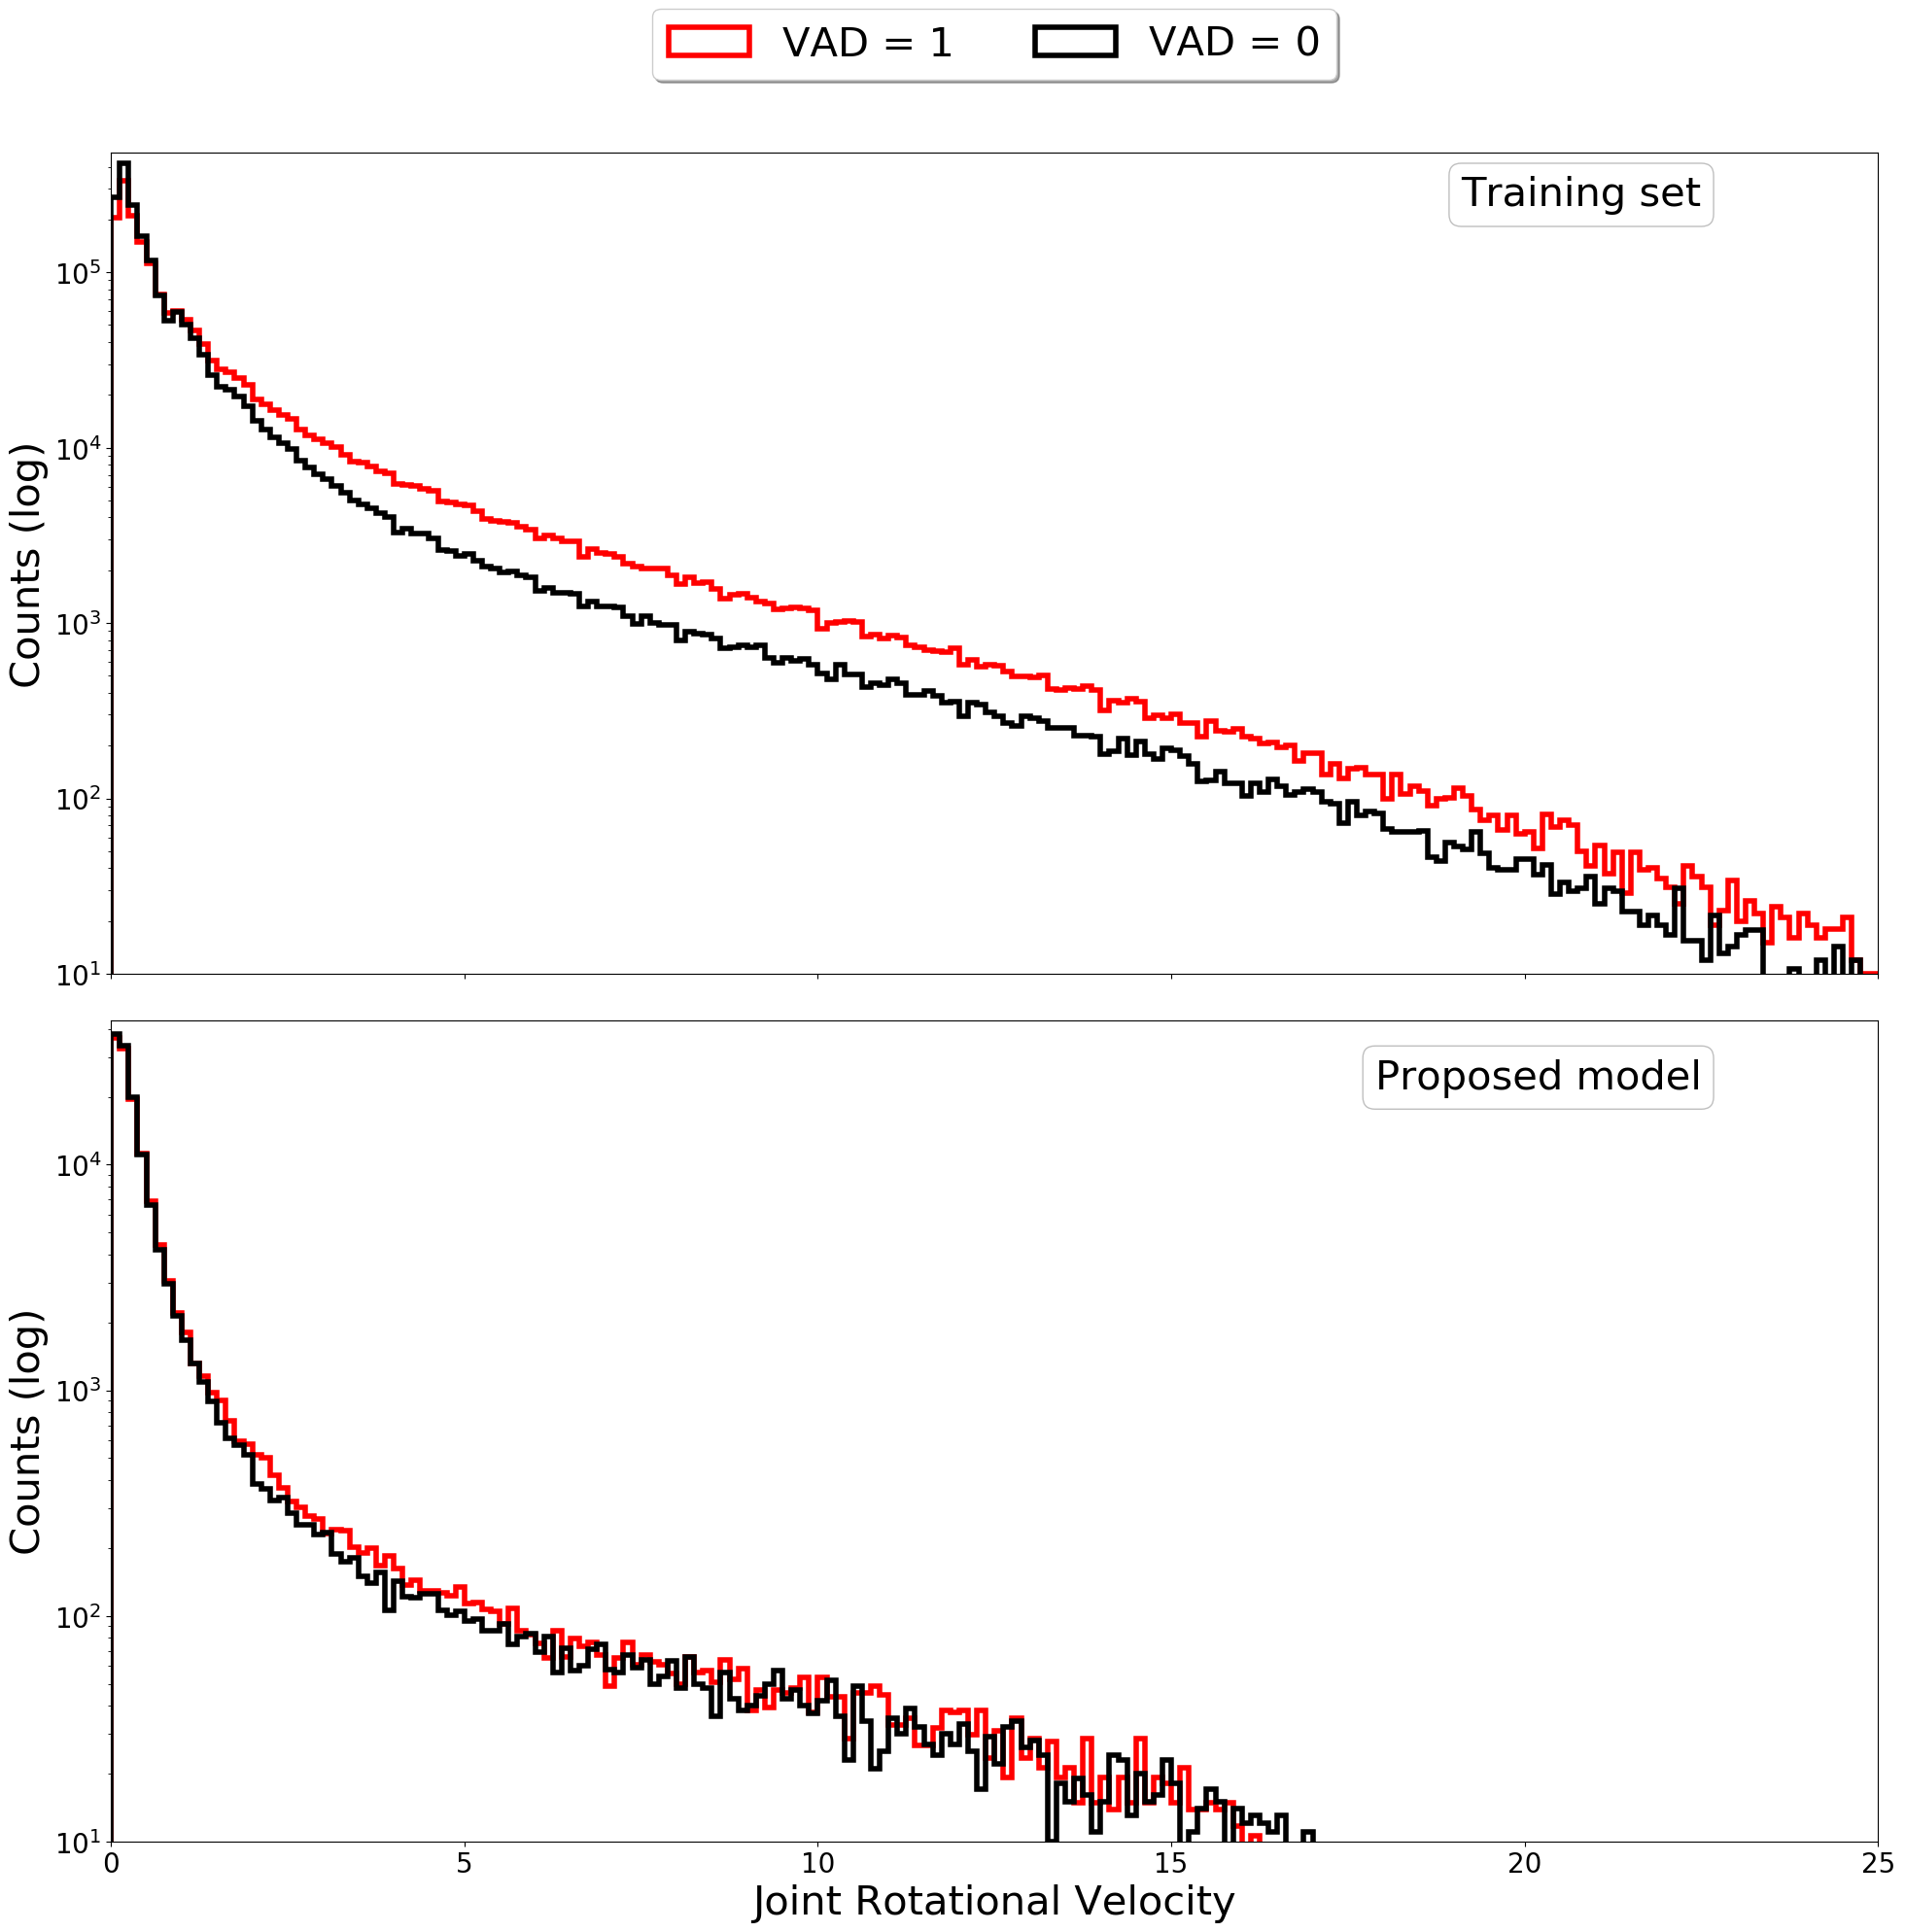

In [3]:
hist1 = [[],[],[],[]]
hist1[0] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_in.npy'))
hist1[1] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_out.npy'))
hist1[2] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_tin.npy'))
hist1[3] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_toutcomposehist.npy'))
hist2 = [[],[],[],[]]
hist2[0] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_in.npy'))
hist2[1] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_out.npy'))
hist2[2] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_tin.npy'))
hist2[3] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_toutcomposehist.npy'))
#hist3 = [[],[],[],[]]
#hist3[0] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_in.npy'))
#hist3[1] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_out.npy'))
#hist3[2] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_tin.npy'))
#hist3[3] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_toutcomposehist.npy'))


#lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
#media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 1, sharex = True, tight_layout=True, figsize=(20,20))
n_bins = 200
lims_range = (0,25)

weigth0 = np.ones(hist1[0].shape)#*(1-len(hist1[0])/(len(hist1[0])+len(hist1[1])))
weigth1 = np.ones(hist1[1].shape)*(len(hist1[0])/len(hist1[1]))
print(weigth1[0])
axs[0].hist(hist1[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=4, range=lims_range, color='red', weights=weigth0)
axs[0].hist(hist1[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=4, range=lims_range, color='black', weights=weigth1)
axs[0].legend(loc='upper center', bbox_to_anchor = (0.5,1.2), ncol=2, fancybox=True, shadow = True, prop={'size':30})

weigth0 = np.ones(hist2[0].shape)*(len(hist2[1])/len(hist2[0]))
weigth1 = np.ones(hist2[1].shape)#*(1-len(hist2[1])/(len(hist2[0])+len(hist2[1])))
print(weigth0[0])
axs[1].hist(hist2[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=4, range=lims_range, color='red', weights=weigth0)
axs[1].hist(hist2[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=4, range=lims_range, color='black', weights=weigth1)
axs[1].set_xlabel('Joint Rotational Velocity', fontsize=30)



models = ['Training set', 'Proposed model']
for i in range(2):
    axs[i].set_ylabel('Counts (log)', fontsize=30)
    box = axs[i].get_position()
    #axs[i].set_position([box.x0, box.y0 + box.height * 0.1,
    #                 box.width, box.height*0.9])
    axs[i].set_xlim(left=lims_range[0], right=lims_range[1])
    axs[i].tick_params(axis='both', labelsize=20)
    bbox = dict(boxstyle='round', fc='white', alpha=0.5, ec='grey', )
    _, m = axs[i].get_ylim()
    axs[i].set_ylim([10,m*1.1])
    #_, m = axs[i].get_xlim()
    #axs[i].set_xlim([0,m])
    xlim = axs[i].get_xlim()
    ylim = axs[i].get_ylim()
    axs[i].text(x = xlim[1]*0.9, y=ylim[1]*0.5, s = models[i], bbox=bbox, size=30, horizontalalignment='right')
    axs[i].set_yscale('log')



plt.show()

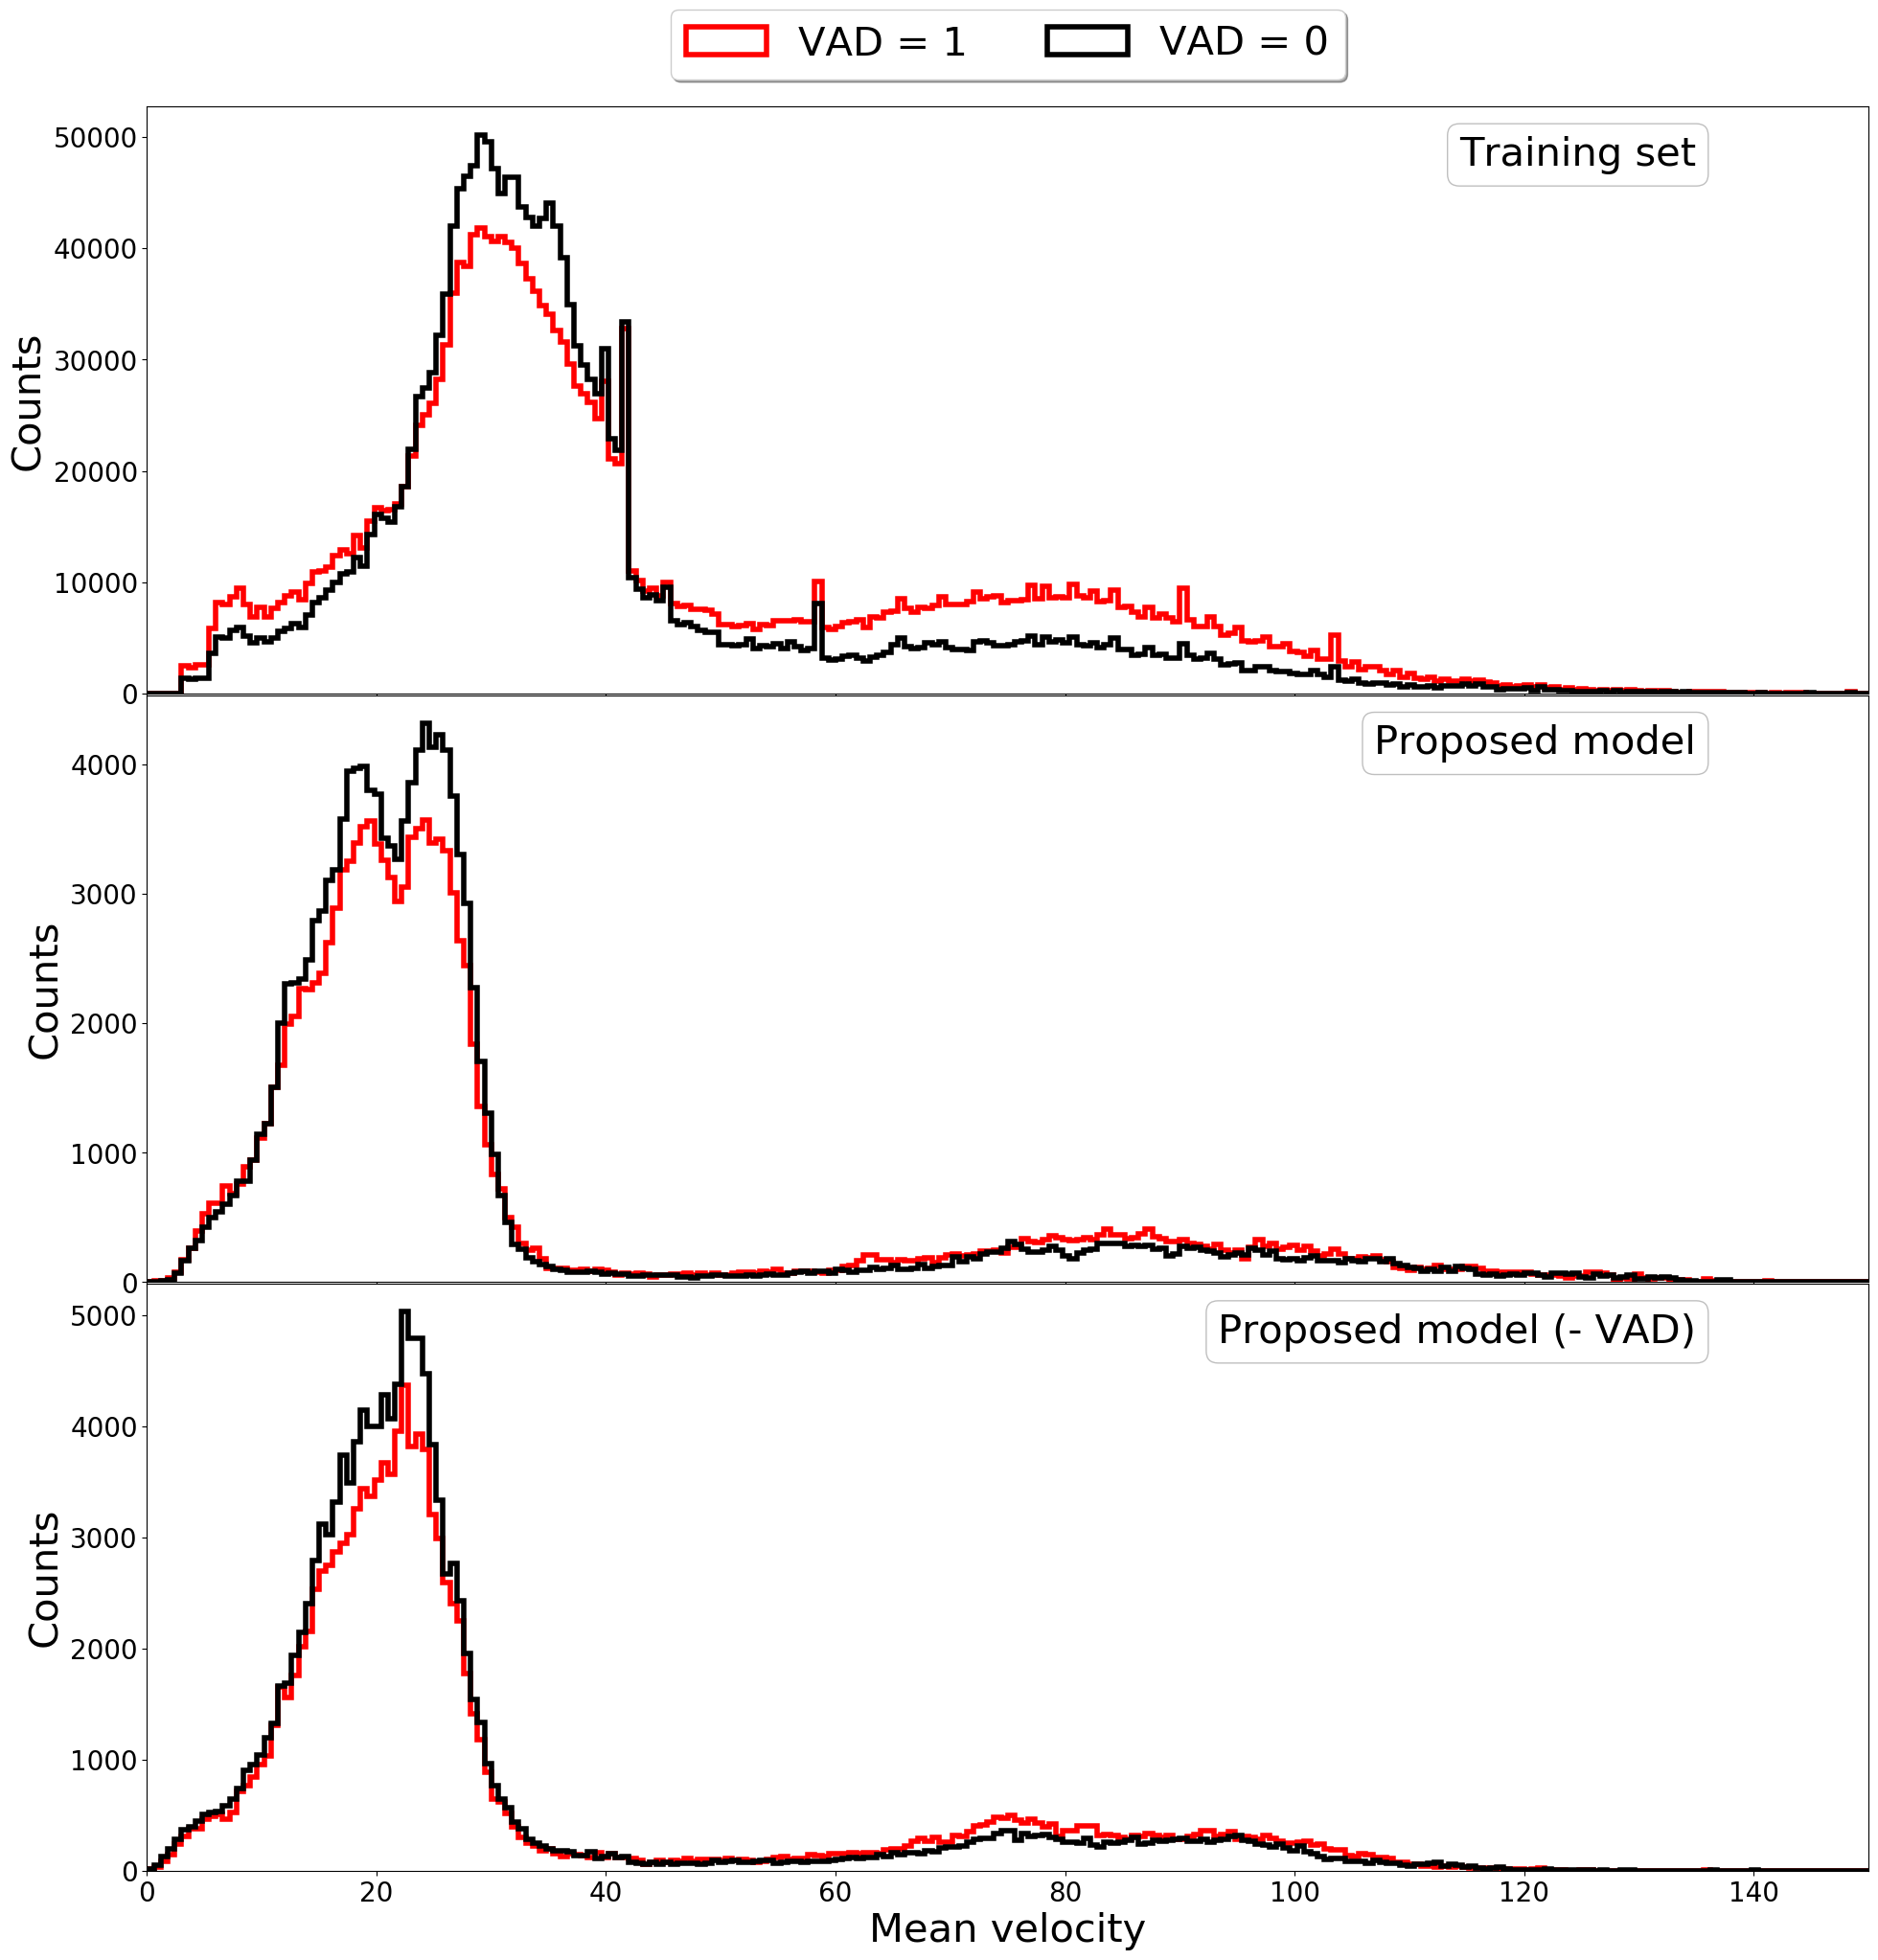

In [30]:
hist1 = [[],[],[],[]]
hist1[0] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_in.npy'))
hist1[1] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_out.npy'))
hist1[2] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_tin.npy'))
hist1[3] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_toutcomposehist.npy'))
hist2 = [[],[],[],[]]
hist2[0] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_in.npy'))
hist2[1] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_out.npy'))
hist2[2] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_tin.npy'))
hist2[3] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_toutcomposehist.npy'))
hist3 = [[],[],[],[]]
hist3[0] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_in.npy'))
hist3[1] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_out.npy'))
hist3[2] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_tin.npy'))
hist3[3] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_toutcomposehist.npy'))


#lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
#media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(3, 1, sharex = True, tight_layout=True, figsize=(20,20))
n_bins = 250
lims_range = (0,150)
axs[0].hist(hist1[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=4, range=lims_range, color='red')
axs[0].hist(hist1[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=4, range=lims_range, color='black')
axs[0].legend(loc='upper center', bbox_to_anchor = (0.5,1.2), ncol=2, fancybox=True, shadow = True, prop={'size':30})
#axs[0].set_xlabel('Mean velocity')

axs[1].hist(hist2[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=4, range=lims_range, color='red')
axs[1].hist(hist2[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=4, range=lims_range, color='black')
#axs[0].set_xlabel('Mean velocity')

axs[2].hist(hist3[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=4, range=lims_range, color='red')
axs[2].hist(hist3[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=4, range=lims_range, color='black')
axs[2].set_xlabel('Mean velocity', fontsize=30)

models = ['Training set', 'Proposed model', 'Proposed model (- VAD)']
for i in range(3):
    axs[i].set_ylabel('Counts', fontsize=30)
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height*0.9])
    axs[i].set_xlim(left=lims_range[0], right=lims_range[1])
    axs[i].tick_params(axis='both', labelsize=20)
    bbox = dict(boxstyle='round', fc='white', alpha=0.5, ec='grey', )
    xlim = axs[i].get_xlim()
    ylim = axs[i].get_ylim()
    axs[i].text(x = xlim[1]*0.9, y=ylim[1]*0.9, s = models[i], bbox=bbox, size=30, horizontalalignment='right')


plt.show()


## default (mfcc)

In [16]:
#audio, marray, joints, vad, tsv, tvad, hist = getmodel(audio, path_default,vadp,tsvp)
#np.save(os.path.join(path_default, 'metrics/r_histogram_vel_in.npy'), hist[0])
#np.save(os.path.join(path_default, 'metrics/r_histogram_vel_out.npy'), hist[1])
#np.save(os.path.join(path_default, 'metrics/r_histogram_vel_tin.npy'), hist[2])
#np.save(os.path.join(path_default, 'metrics/r_histogram_vel_toutcomposehist.npy'), hist[3])
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(path_default, 'metrics/r_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(path_default, 'metrics/r_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(path_default, 'metrics/r_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(path_default, 'metrics/r_histogram_vel_toutcomposehist.npy'))
print(skew(hist[0]))
print(skew(hist[1]))
print(skew(hist[2]))
print(skew(hist[3]))

-0.4779382447085285
-0.42984797235954636
-0.5233278581390183
-0.36841373818545353


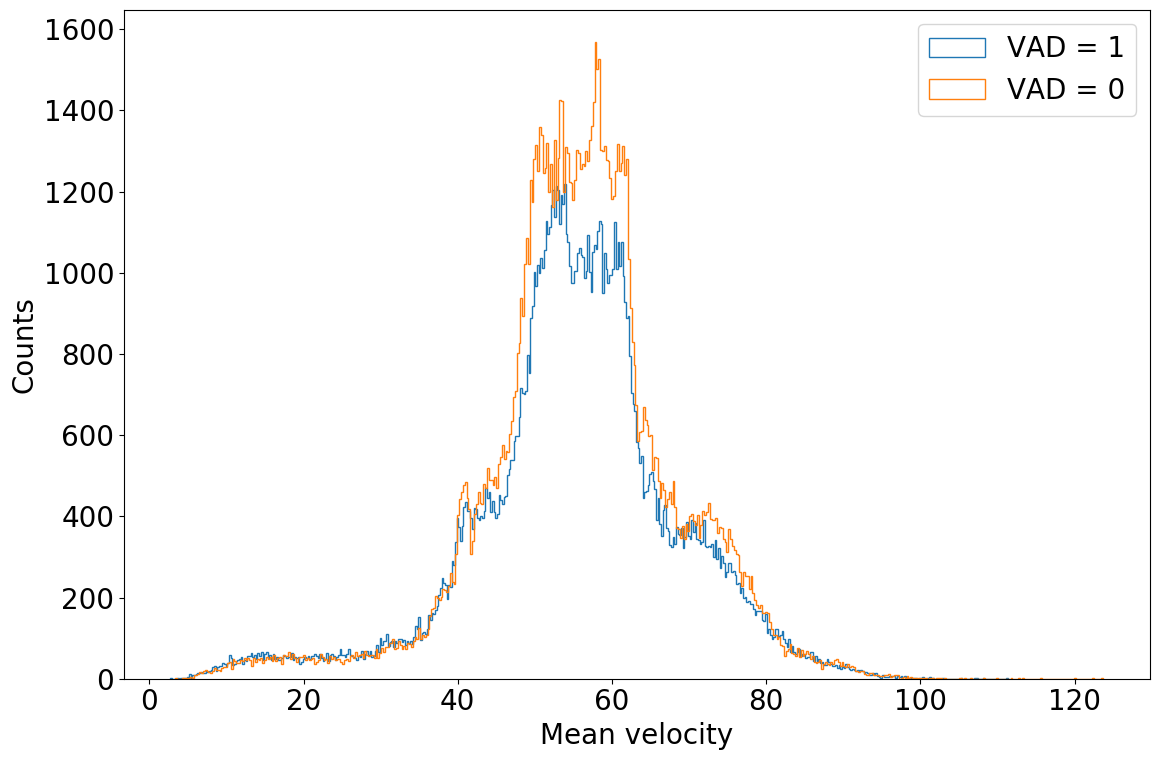

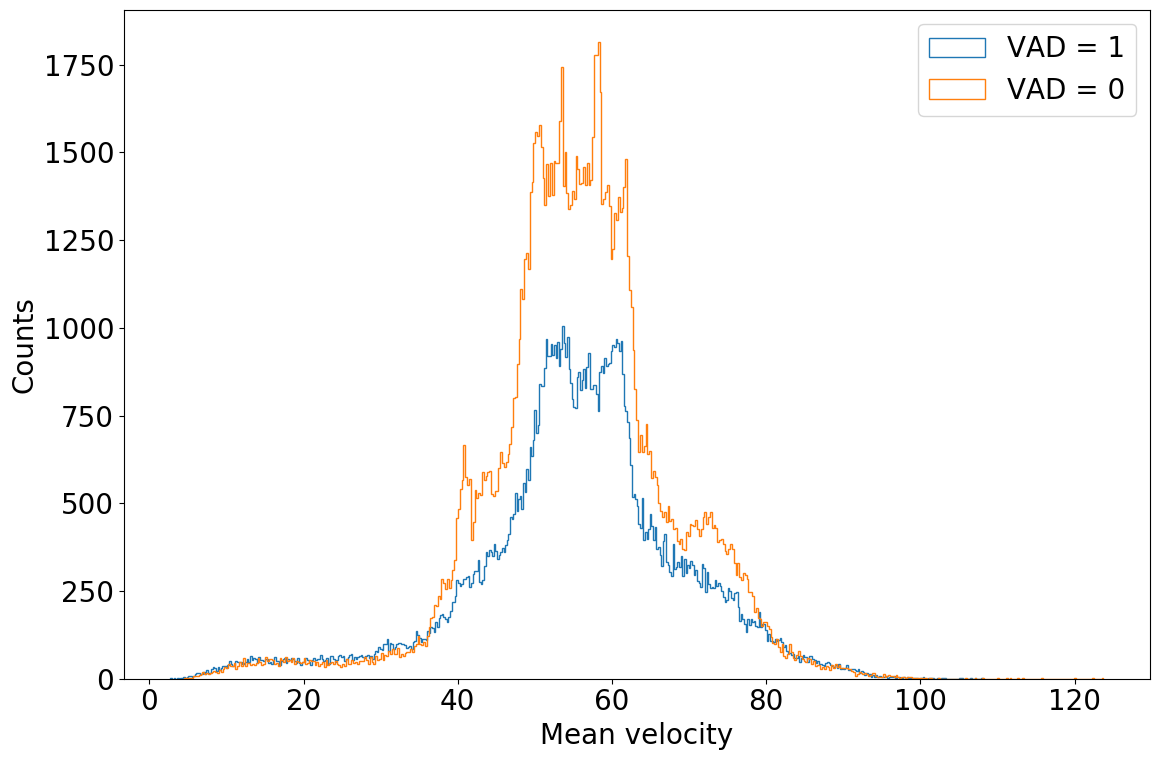

In [17]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
n_bins = 500
axs.hist(hist[0], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[1], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
axs.hist(hist[2], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[3], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

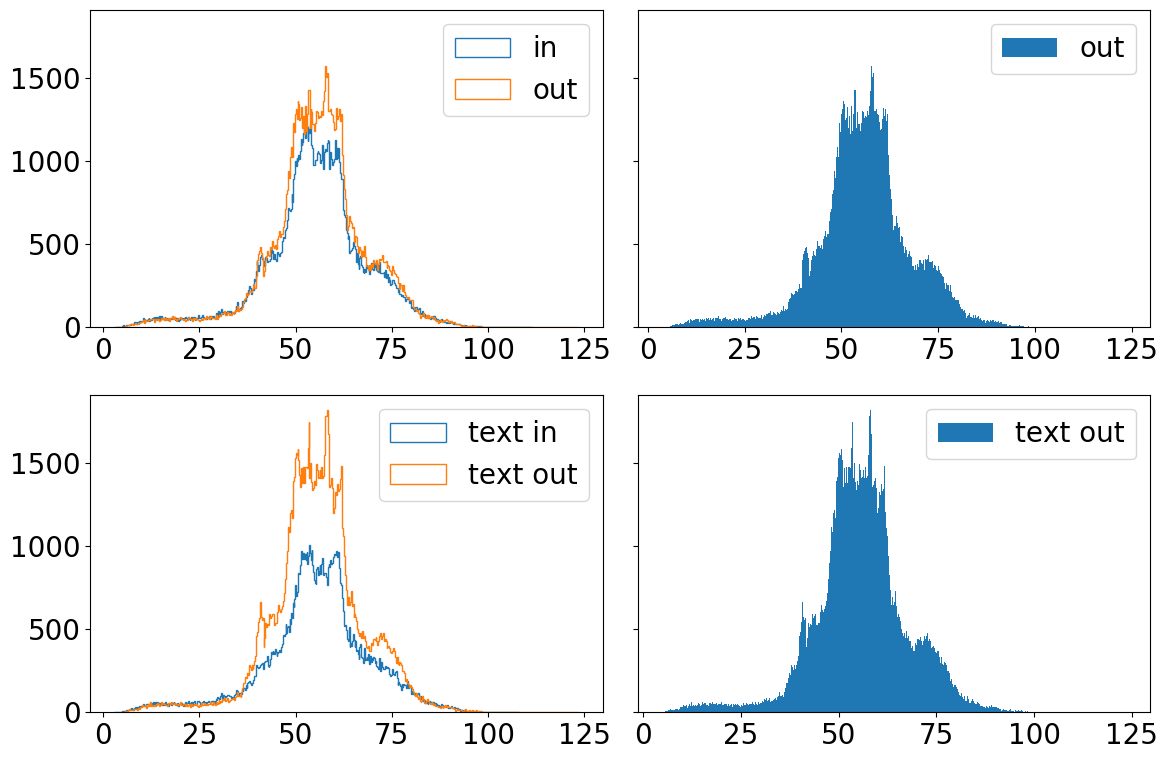

In [95]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,8))
n_bins = 500
#lims_range = (0, 300)
#axs[0][0].hist(hist[0], bins=n_bins, label='in', range=lims_range)
axs[0][0].hist(hist[0], bins=n_bins, label='in', histtype='step')
axs[0][0].legend()
axs[0][0].hist(hist[1], bins=n_bins, label='out', histtype='step')
axs[0][0].legend()
axs[0][1].hist(hist[1], bins=n_bins, label='out')
axs[0][1].legend()
axs[1][0].hist(hist[2], bins=n_bins, label='text in', histtype='step')
axs[1][0].legend()
axs[1][0].hist(hist[3], bins=n_bins, label='text out', histtype='step')
axs[1][0].legend()
axs[1][1].hist(hist[3], bins=n_bins, label='text out')
axs[1][1].legend()
#axs[0][0].set_ylim(top=300)
plt.show()

## VAD from text (vad_wavlm_gt)

In [19]:
#audio, marray, joints, vad, tsv, tvad, hist = getmodel(audio, path_fromtext,vadp, tsvp)
#np.save(os.path.join(path_fromtext, 'metrics/r_histogram_vel_in.npy'), hist[0])
#np.save(os.path.join(path_fromtext, 'metrics/r_histogram_vel_out.npy'), hist[1])
#np.save(os.path.join(path_fromtext, 'metrics/r_histogram_vel_tin.npy'), hist[2])
#np.save(os.path.join(path_fromtext, 'metrics/r_histogram_vel_toutcomposehist.npy'), hist[3])
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(path_fromtext, 'metrics/r_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(path_fromtext, 'metrics/r_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(path_fromtext, 'metrics/r_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(path_fromtext, 'metrics/r_histogram_vel_toutcomposehist.npy'))
print(skew(hist[0]))
print(skew(hist[1]))
print(skew(hist[2]))
print(skew(hist[3]))

1.2585259324624973
1.5345794429060455
1.1383485768001045
1.615234203445083


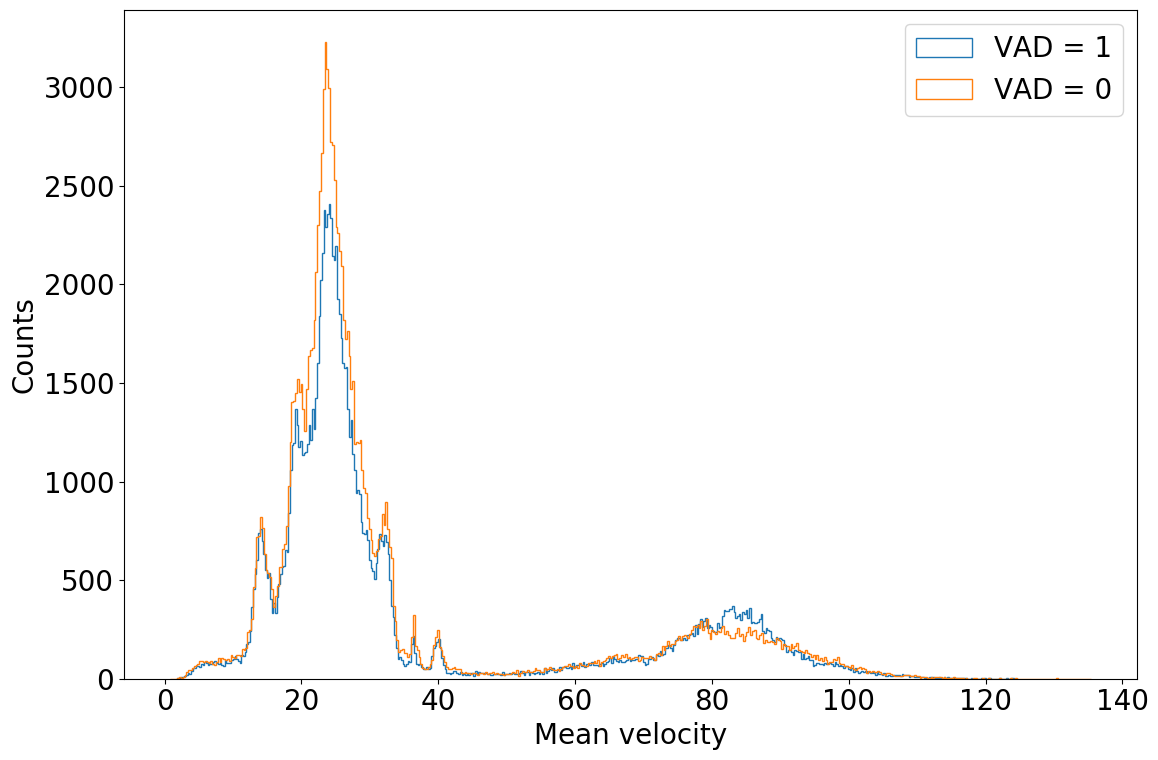

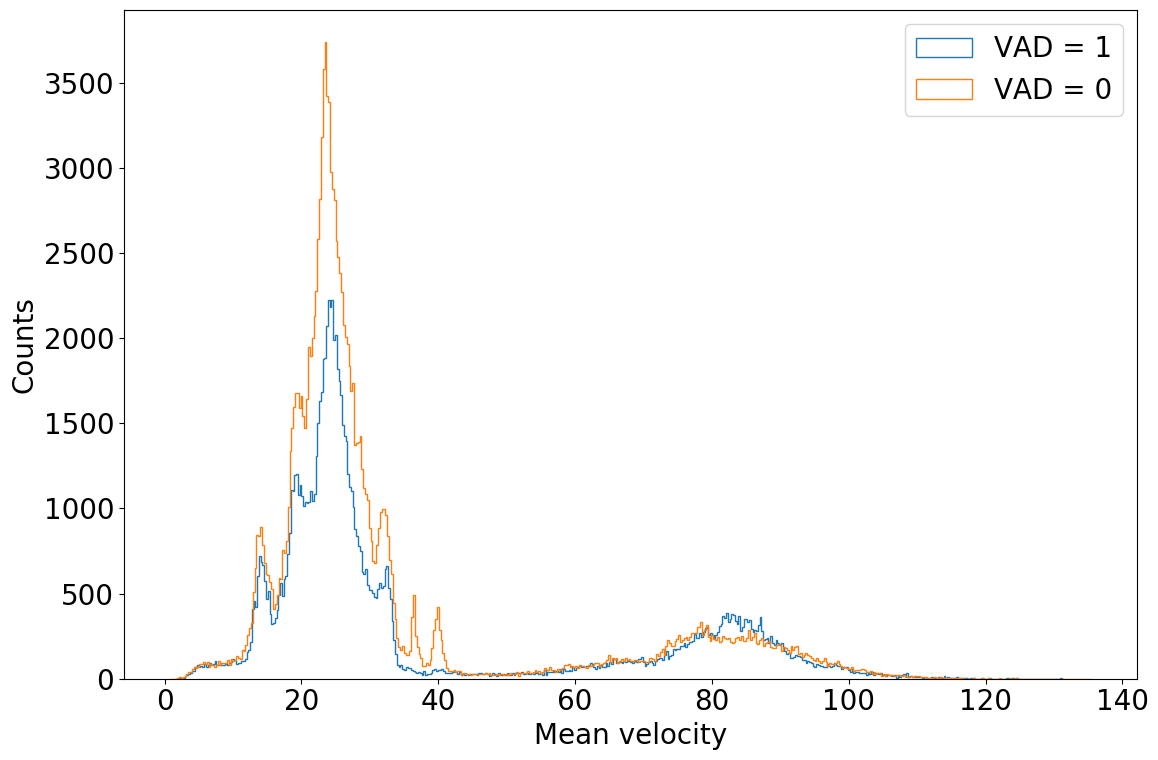

In [15]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
n_bins = 500
axs.hist(hist[0], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[1], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
axs.hist(hist[2], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[3], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

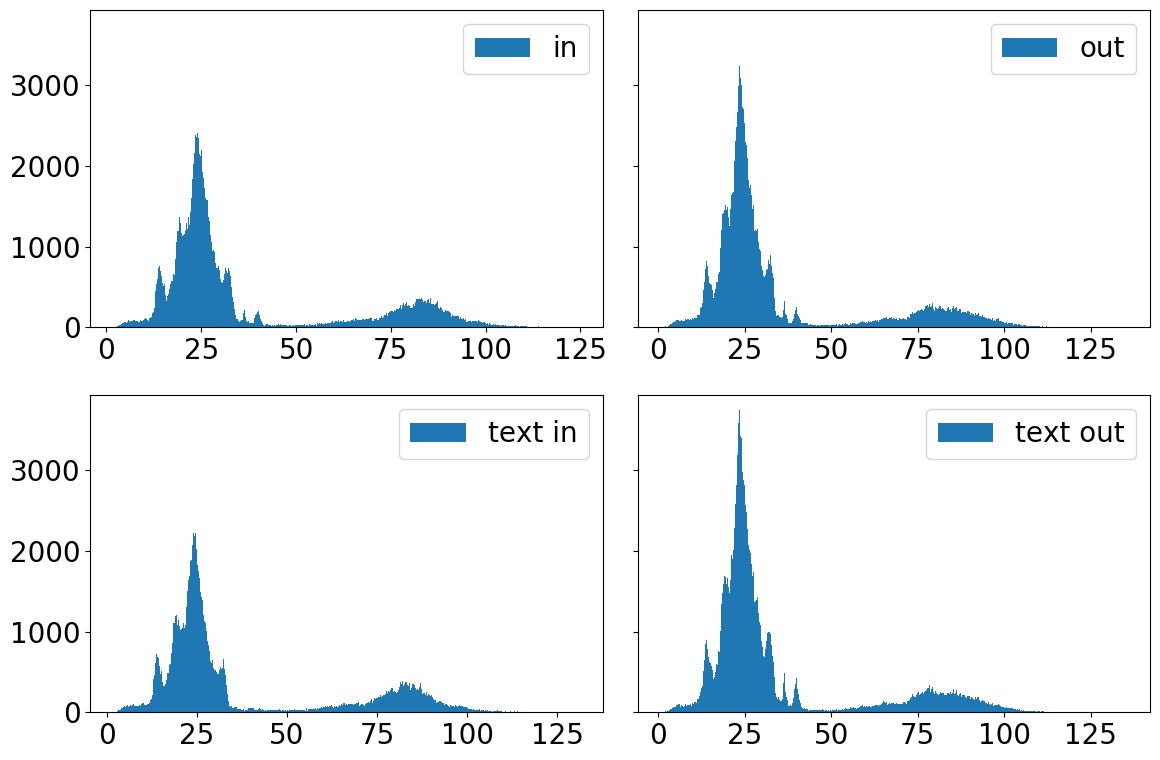

In [20]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,8))
n_bins = 500
#lims_range = (0, 300)
#axs[0][0].hist(hist[0], bins=n_bins, label='in', range=lims_range)
axs[0][0].hist(hist[0], bins=n_bins, label='in')
axs[0][0].legend()
axs[0][1].hist(hist[1], bins=n_bins, label='out')
axs[0][1].legend()
axs[1][0].hist(hist[2], bins=n_bins, label='text in')
axs[1][0].legend()
axs[1][1].hist(hist[3], bins=n_bins, label='text out')
axs[1][1].legend()
#axs[0][0].set_ylim(top=300)
plt.show()

## No VAD (wavlm)

In [4]:
audio, marray, joints, vad, tsv, tvad, hist = getmodel(audio, path_novad,vadp,tsvp)
np.save(os.path.join(path_novad, 'metrics/v_histogram_vel_in.npy'), hist[0])
np.save(os.path.join(path_novad, 'metrics/v_histogram_vel_out.npy'), hist[1])
np.save(os.path.join(path_novad, 'metrics/v_histogram_vel_tin.npy'), hist[2])
np.save(os.path.join(path_novad, 'metrics/v_histogram_vel_toutcomposehist.npy'), hist[3])
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(path_novad, 'metrics/v_histogram_vel_toutcomposehist.npy'))
#print(skew(hist[0]))
#print(skew(hist[1]))
#print(skew(hist[2]))
#print(skew(hist[3]))

tst_2023_v0_000_main-agent.npy
tst_2023_v0_001_main-agent.npy
tst_2023_v0_002_main-agent.npy
tst_2023_v0_003_main-agent.npy
tst_2023_v0_004_main-agent.npy
tst_2023_v0_005_main-agent.npy
tst_2023_v0_006_main-agent.npy
tst_2023_v0_007_main-agent.npy
tst_2023_v0_008_main-agent.npy
tst_2023_v0_009_main-agent.npy
tst_2023_v0_010_main-agent.npy
tst_2023_v0_011_main-agent.npy
tst_2023_v0_012_main-agent.npy
tst_2023_v0_013_main-agent.npy
tst_2023_v0_014_main-agent.npy
tst_2023_v0_015_main-agent.npy
tst_2023_v0_016_main-agent.npy
tst_2023_v0_017_main-agent.npy
tst_2023_v0_018_main-agent.npy
tst_2023_v0_019_main-agent.npy
tst_2023_v0_020_main-agent.npy
tst_2023_v0_021_main-agent.npy
tst_2023_v0_022_main-agent.npy
tst_2023_v0_023_main-agent.npy
tst_2023_v0_024_main-agent.npy
tst_2023_v0_025_main-agent.npy
tst_2023_v0_026_main-agent.npy
tst_2023_v0_027_main-agent.npy
tst_2023_v0_028_main-agent.npy
tst_2023_v0_029_main-agent.npy
tst_2023_v0_030_main-agent.npy
tst_2023_v0_031_main-agent.npy
tst_2023

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


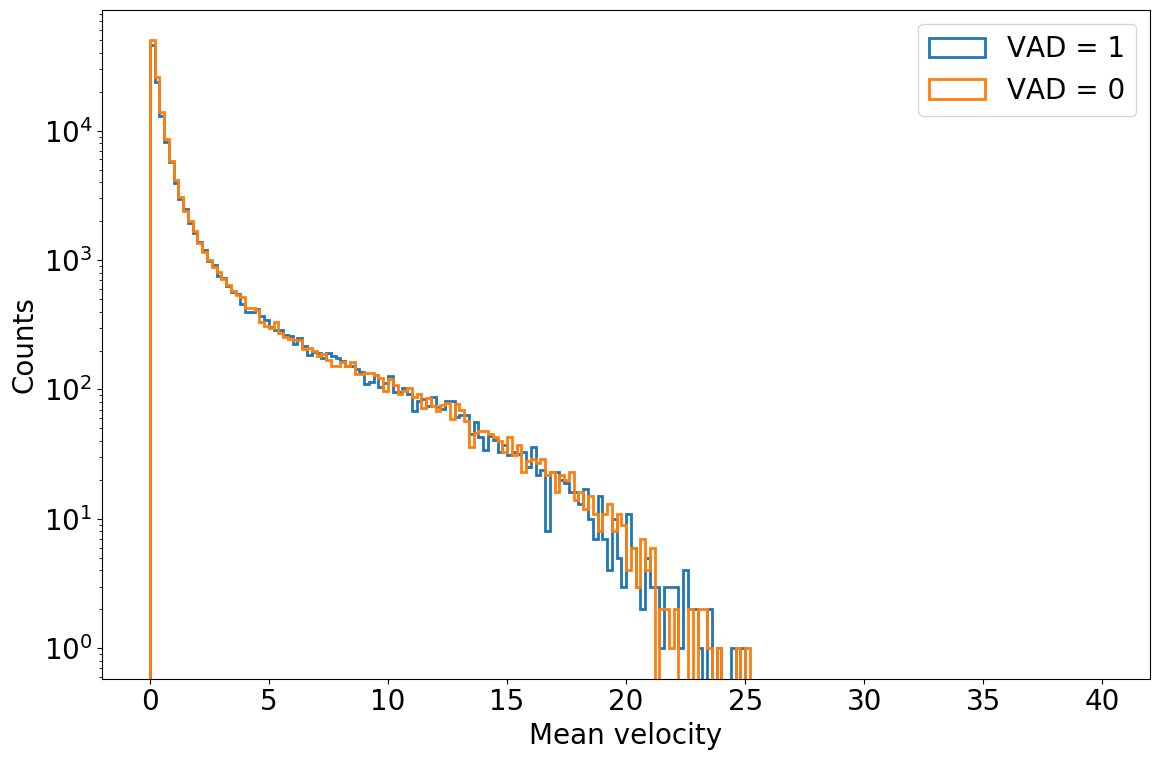

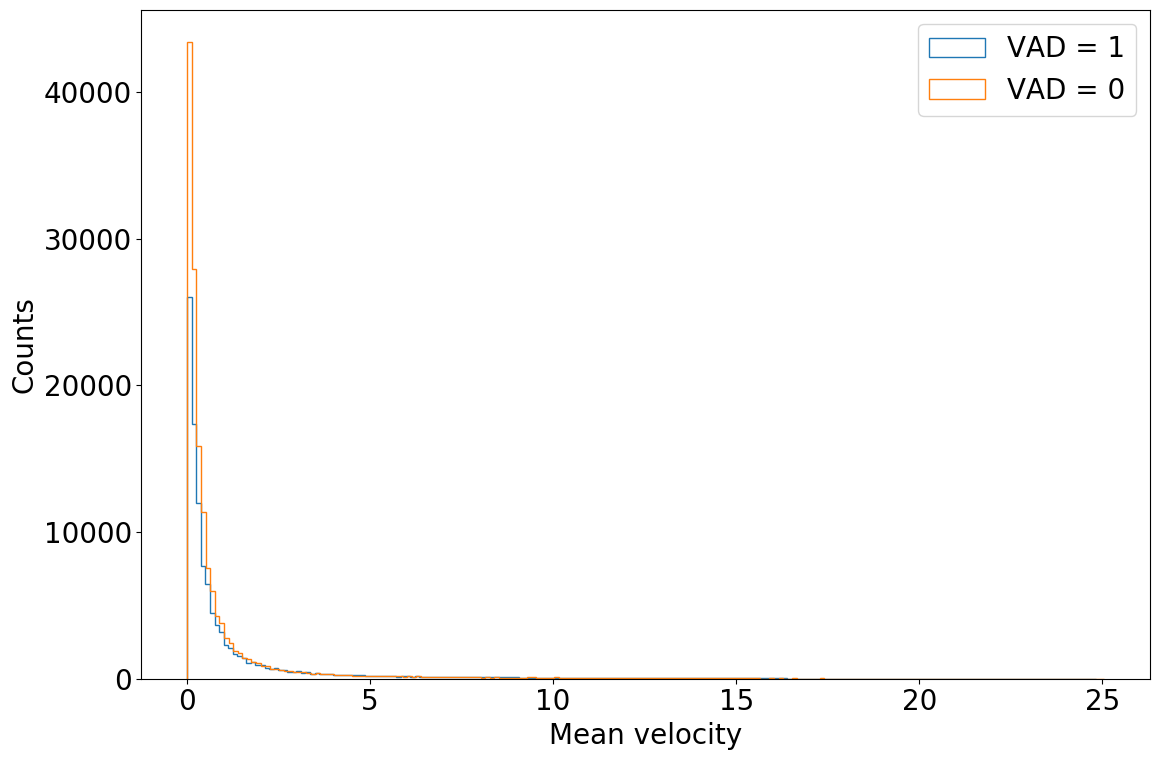

In [5]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
n_bins = 200
lims_range = (0,40)
axs.hist(hist[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=2, range=lims_range)
axs.legend()
axs.hist(hist[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=2, range=lims_range)
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
#axs.set_ylim([0, 1000])
axs.set_yscale('log')


fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
axs.hist(hist[2], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[3], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

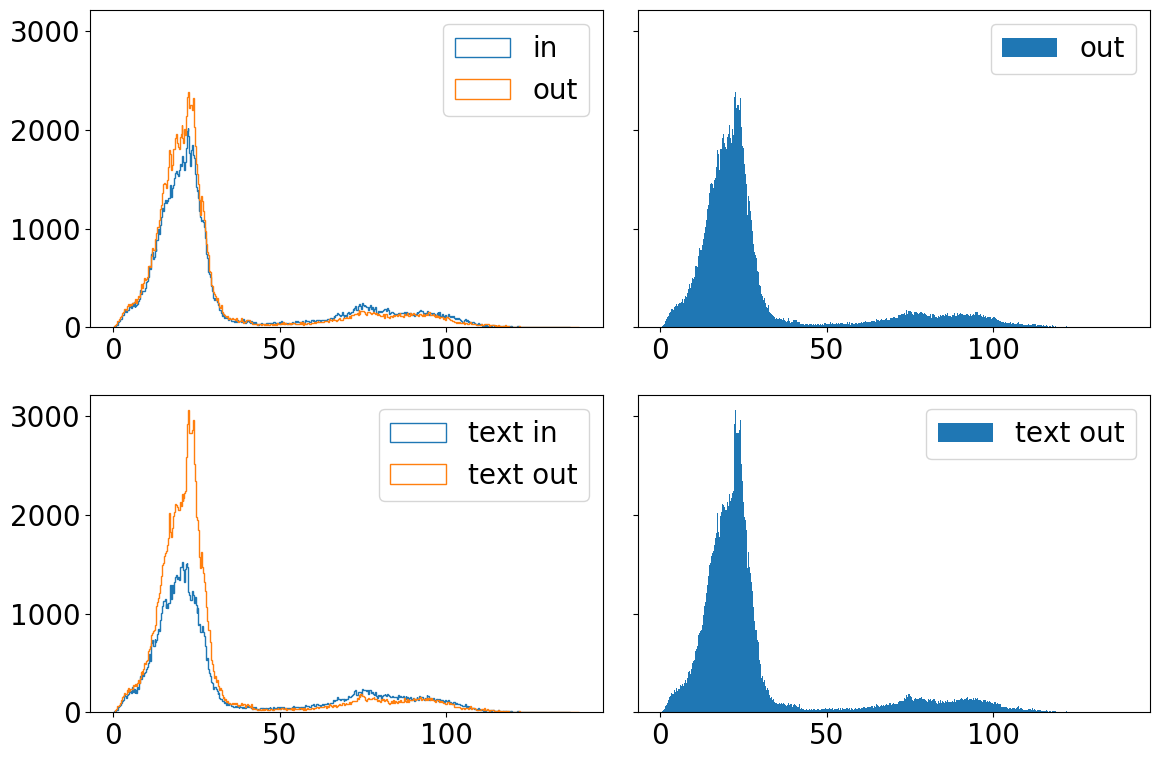

In [6]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,8))
n_bins = 500
#lims_range = (0, 300)
#axs[0][0].hist(hist[0], bins=n_bins, label='in', range=lims_range)
axs[0][0].hist(hist[0], bins=n_bins, label='in', histtype='step')
axs[0][0].legend()
axs[0][0].hist(hist[1], bins=n_bins, label='out', histtype='step')
axs[0][0].legend()
axs[0][1].hist(hist[1], bins=n_bins, label='out')
axs[0][1].legend()
axs[1][0].hist(hist[2], bins=n_bins, label='text in', histtype='step')
axs[1][0].legend()
axs[1][0].hist(hist[3], bins=n_bins, label='text out', histtype='step')
axs[1][0].legend()
axs[1][1].hist(hist[3], bins=n_bins, label='text out')
axs[1][1].legend()
#axs[0][0].set_ylim(top=300)
plt.show()

## VAD (vad_wavlm)

In [66]:
#audio, marray, joints, vad, tsv, tvad, hist = getmodel(audio, path_vad, vadp,tsvp)
#np.save(os.path.join(path_vad, 'metrics/v_histogram_vel_in.npy'), hist[0])
#np.save(os.path.join(path_vad, 'metrics/v_histogram_vel_out.npy'), hist[1])
#np.save(os.path.join(path_vad, 'metrics/v_histogram_vel_tin.npy'), hist[2])
#np.save(os.path.join(path_vad, 'metrics/v_histogram_vel_toutcomposehist.npy'), hist[3])
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(path_vad, 'metrics/v_histogram_vel_toutcomposehist.npy'))
#print(skew(hist[0]))
#print(skew(hist[1]))
#print(skew(hist[2]))
#print(skew(hist[3]))

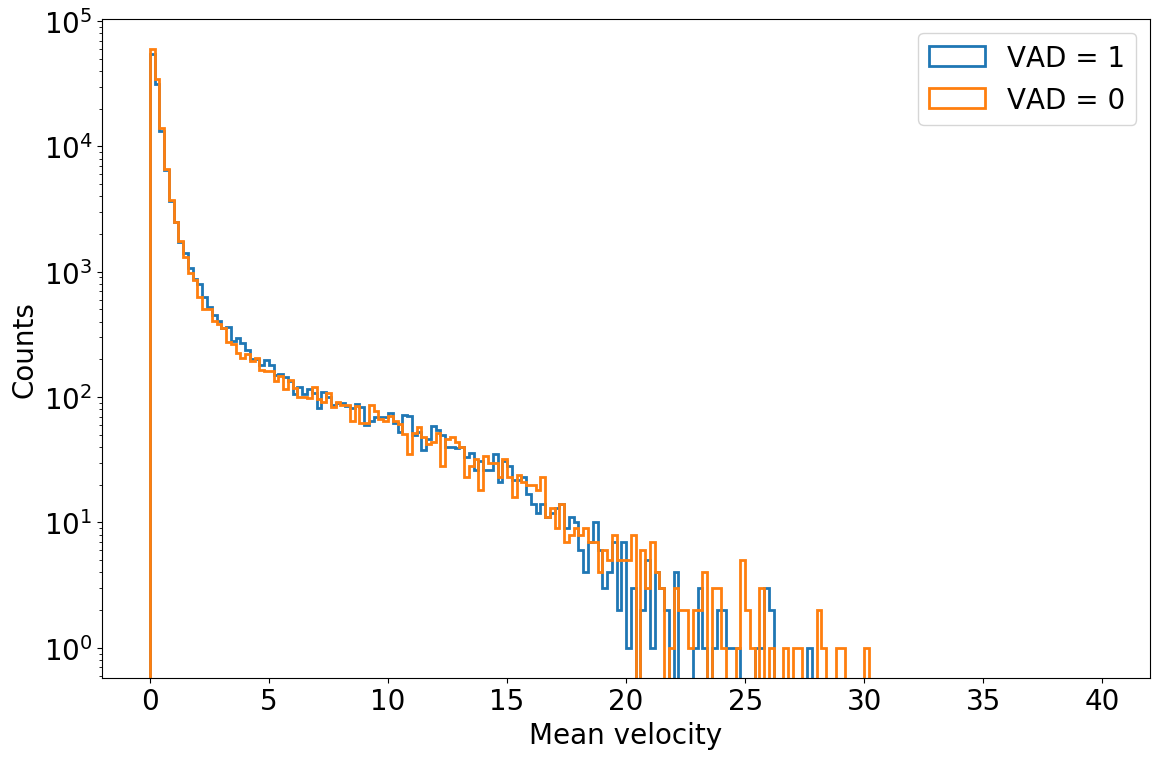

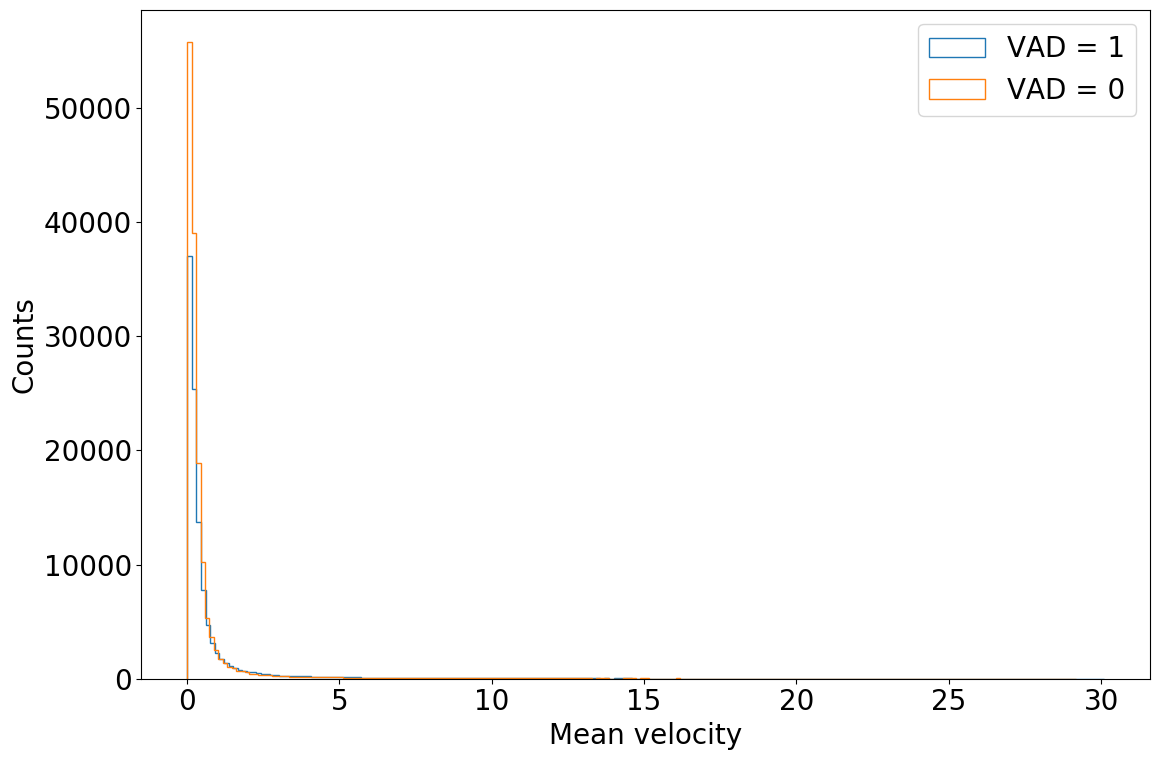

In [67]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
n_bins = 200
lims_range = (0,40)
axs.hist(hist[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=2, range=lims_range)
axs.legend()
axs.hist(hist[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=2, range=lims_range)
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
#axs.set_ylim([0, 1000])
axs.set_yscale('log')

plt.show()

fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
axs.hist(hist[2], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[3], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

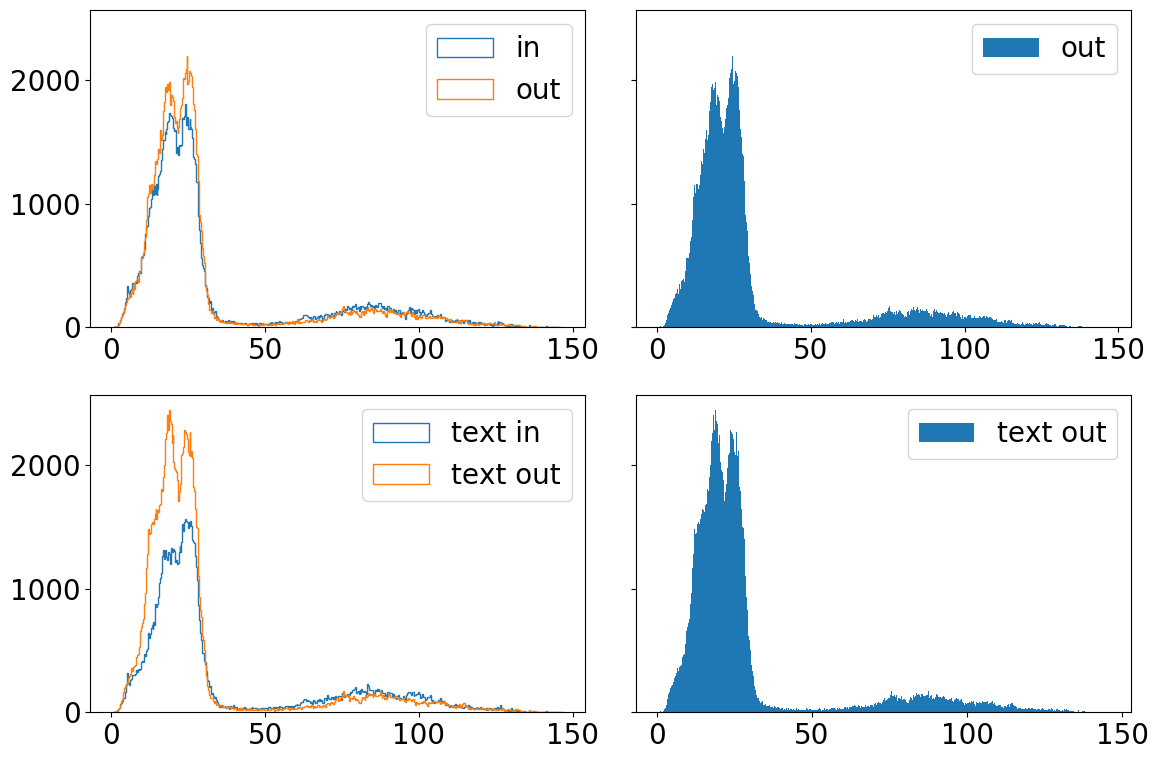

In [8]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,8))
n_bins = 500
#lims_range = (0, 300)
#axs[0][0].hist(hist[0], bins=n_bins, label='in', range=lims_range)
axs[0][0].hist(hist[0], bins=n_bins, label='in', histtype='step')
axs[0][0].legend()
axs[0][0].hist(hist[1], bins=n_bins, label='out', histtype='step')
axs[0][0].legend()
axs[0][1].hist(hist[1], bins=n_bins, label='out')
axs[0][1].legend()
axs[1][0].hist(hist[2], bins=n_bins, label='text in', histtype='step')
axs[1][0].legend()
axs[1][0].hist(hist[3], bins=n_bins, label='text out', histtype='step')
axs[1][0].legend()
axs[1][1].hist(hist[3], bins=n_bins, label='text out')
axs[1][1].legend()
#axs[0][0].set_ylim(top=300)
plt.show()

## Groun truth / NA / (validation)

In [83]:
#audio, marray, joints, vad, tsv, tvad, hist = getgt(audiogt, motiongt, vadgt, tsvgt)
#np.save(os.path.join(motiongt, 'metrics/r_histogram_vel_in.npy'), hist[0])
#np.save(os.path.join(motiongt, 'metrics/r_histogram_vel_out.npy'), hist[1])
#np.save(os.path.join(motiongt, 'metrics/r_histogram_vel_tin.npy'), hist[2])
#np.save(os.path.join(motiongt, 'metrics/r_histogram_vel_toutcomposehist.npy'), hist[3])
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(motiongt, 'metrics/r_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(motiongt, 'metrics/r_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(motiongt, 'metrics/r_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(motiongt, 'metrics/r_histogram_vel_toutcomposehist.npy'))
print(skew(hist[0]))
print(skew(hist[1]))
print(skew(hist[2]))
print(skew(hist[3]))

0.8870149102420891
1.8623014209878037
0.7452642331529163
2.1986283503473554


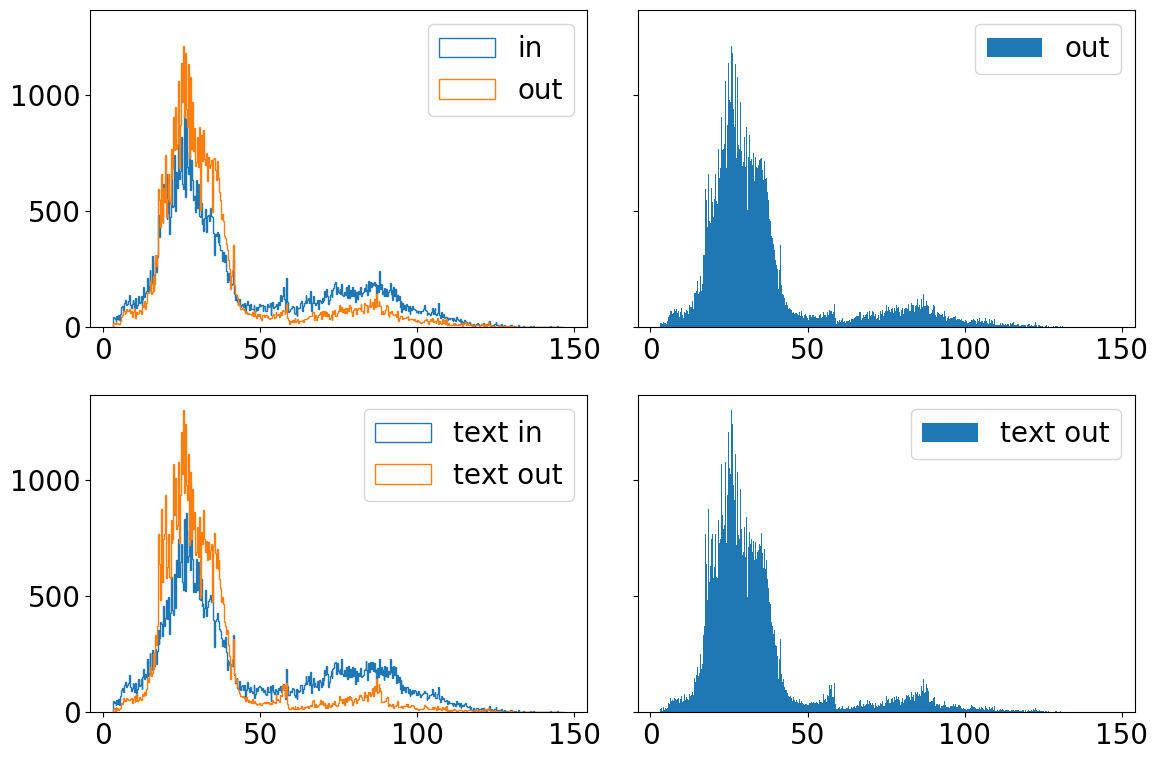

In [86]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,8))
n_bins = 500
#lims_range = (0, 300)
#axs[0][0].hist(hist[0], bins=n_bins, label='in', range=lims_range)
axs[0][0].hist(hist[0], bins=n_bins, label='in', histtype='step')
axs[0][0].legend()
axs[0][0].hist(hist[1], bins=n_bins, label='out', histtype='step')
axs[0][0].legend()
axs[0][1].hist(hist[1], bins=n_bins, label='out')
axs[0][1].legend()
axs[1][0].hist(hist[2], bins=n_bins, label='text in', histtype='step')
axs[1][0].legend()
axs[1][0].hist(hist[3], bins=n_bins, label='text out', histtype='step')
axs[1][0].legend()
axs[1][1].hist(hist[3], bins=n_bins, label='text out')
axs[1][1].legend()
#axs[0][0].set_ylim(top=300)
plt.show()

## Groun truth / NA / (train)

In [90]:
#audio, marray, joints, vad, tsv, tvad, hist = getgt(audiotrn, motiontrn, vadtrn, tsvtrn)
#np.save(os.path.join(motiongt, 'metrics/v_histogram_vel_in.npy'), hist[0])
#np.save(os.path.join(motiongt, 'metrics/v_histogram_vel_out.npy'), hist[1])
#np.save(os.path.join(motiongt, 'metrics/v_histogram_vel_tin.npy'), hist[2])
#np.save(os.path.join(motiongt, 'metrics/v_histogram_vel_toutcomposehist.npy'), hist[3])
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(motiongt, 'metrics/v_histogram_vel_toutcomposehist.npy'))

In [79]:
print(len(hist[0])/(len(hist[0])+len(hist[1])), len(hist[1])/(len(hist[0])+len(hist[1])))

0.5430238779223023 0.45697612207769767


0.45697612207769767
0.5430238779223023


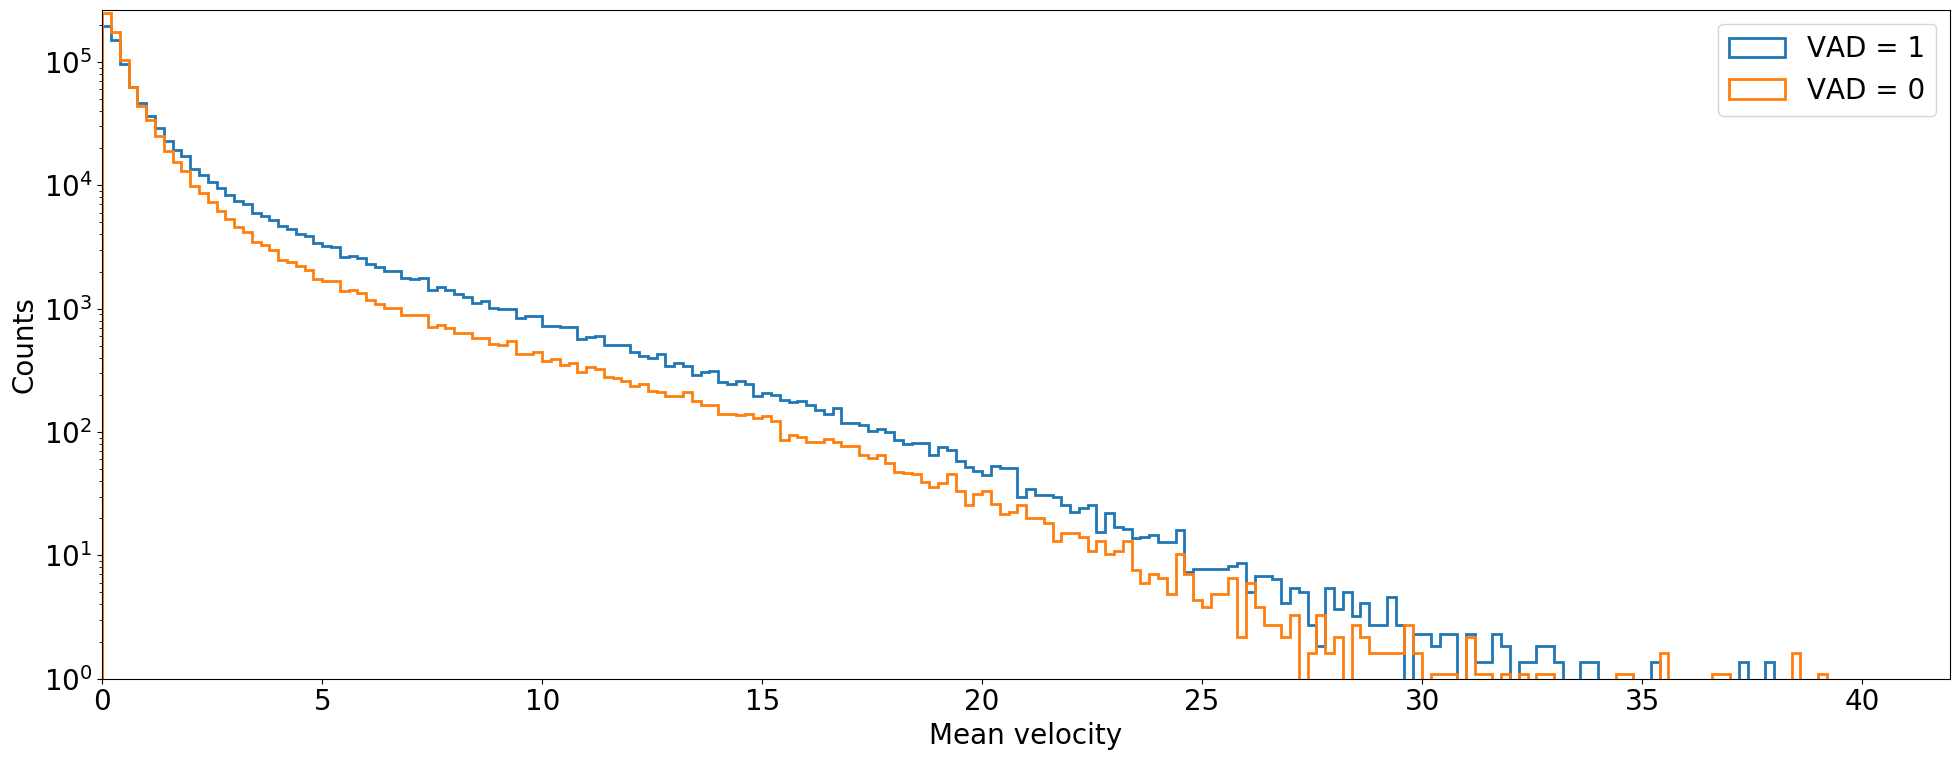

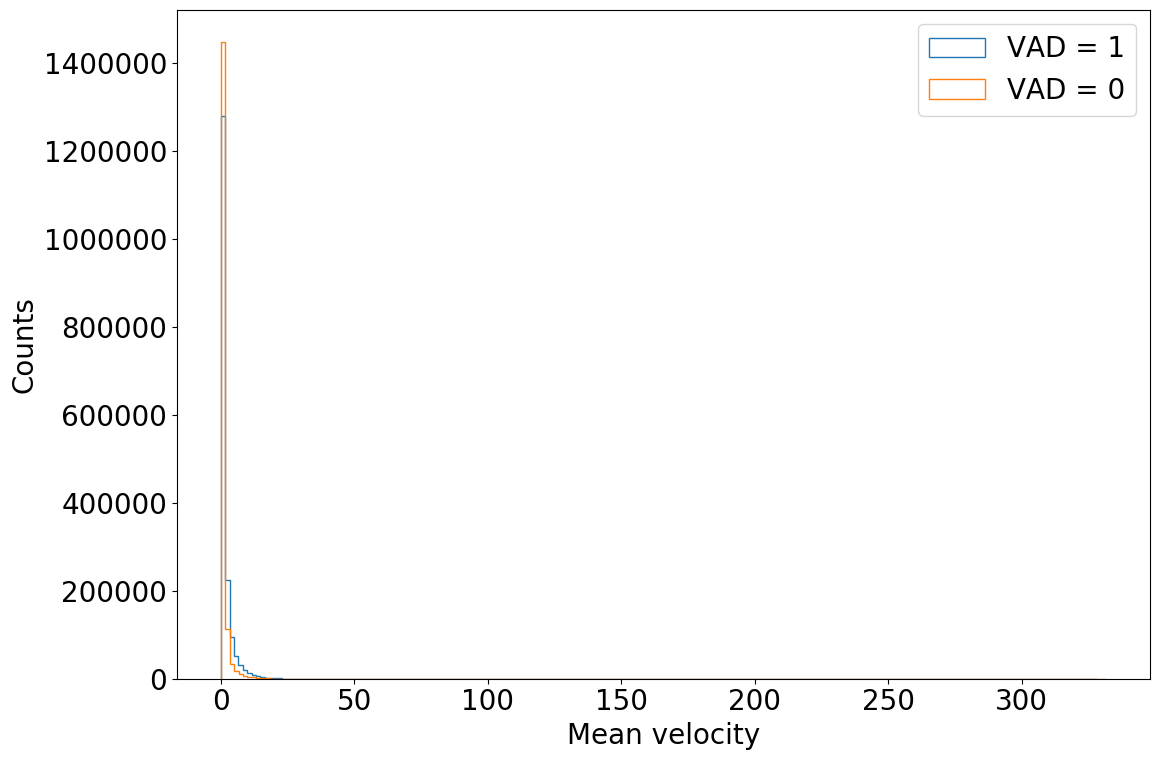

In [100]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(tight_layout=True, figsize=(20,8))
n_bins = 200
lims_range = (0, 40)
weigth0 = np.ones(hist[0].shape)*(1-len(hist[0])/(len(hist[0])+len(hist[1])))
print(weigth0[0])
weigth1 = np.ones(hist[1].shape)*(1-len(hist[1])/(len(hist[0])+len(hist[1])))
print(weigth1[0])
axs.hist(hist[0], bins=n_bins, label='VAD = 1', histtype='step', linewidth=2, range=lims_range, weights=weigth0)
axs.legend()
axs.hist(hist[1], bins=n_bins, label='VAD = 0', histtype='step', linewidth=2, range=lims_range, weights=weigth1)
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
_, m = axs.get_ylim()
axs.set_ylim([1,m])
_, m = axs.get_xlim()
axs.set_xlim([0,m])
axs.set_yscale('log')
plt.show()

fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
axs.hist(hist[2], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[3], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

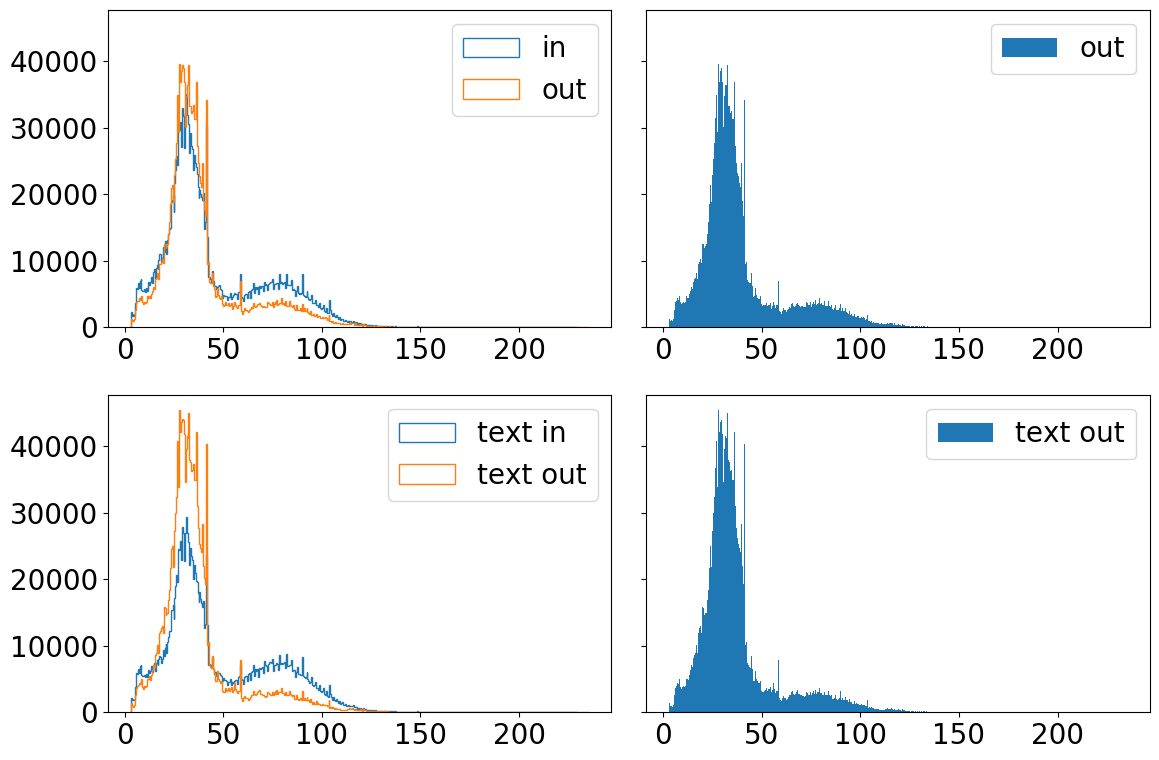

In [29]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,8))
n_bins = 500
#lims_range = (0, 300)
#axs[0][0].hist(hist[0], bins=n_bins, label='in', range=lims_range)
axs[0][0].hist(hist[0], bins=n_bins, label='in', histtype='step')
axs[0][0].legend()
axs[0][0].hist(hist[1], bins=n_bins, label='out', histtype='step')
axs[0][0].legend()
axs[0][1].hist(hist[1], bins=n_bins, label='out')
axs[0][1].legend()
axs[1][0].hist(hist[2], bins=n_bins, label='text in', histtype='step')
axs[1][0].legend()
axs[1][0].hist(hist[3], bins=n_bins, label='text out', histtype='step')
axs[1][0].legend()
axs[1][1].hist(hist[3], bins=n_bins, label='text out')
axs[1][1].legend()
#axs[0][0].set_ylim(top=300)
plt.show()

# TESTE DE FIGURAS

In [136]:
hist = [[],[],[],[]]
hist[0] = np.load(os.path.join(path_vad, 'metrics/r_histogram_vel_in.npy'))
hist[1] = np.load(os.path.join(path_vad, 'metrics/r_histogram_vel_out.npy'))
hist[2] = np.load(os.path.join(path_vad, 'metrics/r_histogram_vel_tin.npy'))
hist[3] = np.load(os.path.join(path_vad, 'metrics/r_histogram_vel_toutcomposehist.npy'))
print(skew(hist[0]))
print(skew(hist[1]))
print(skew(hist[2]))
print(skew(hist[3]))

1.6312199975329698
2.0405804109856223
1.4015492745480072
2.257883137435356


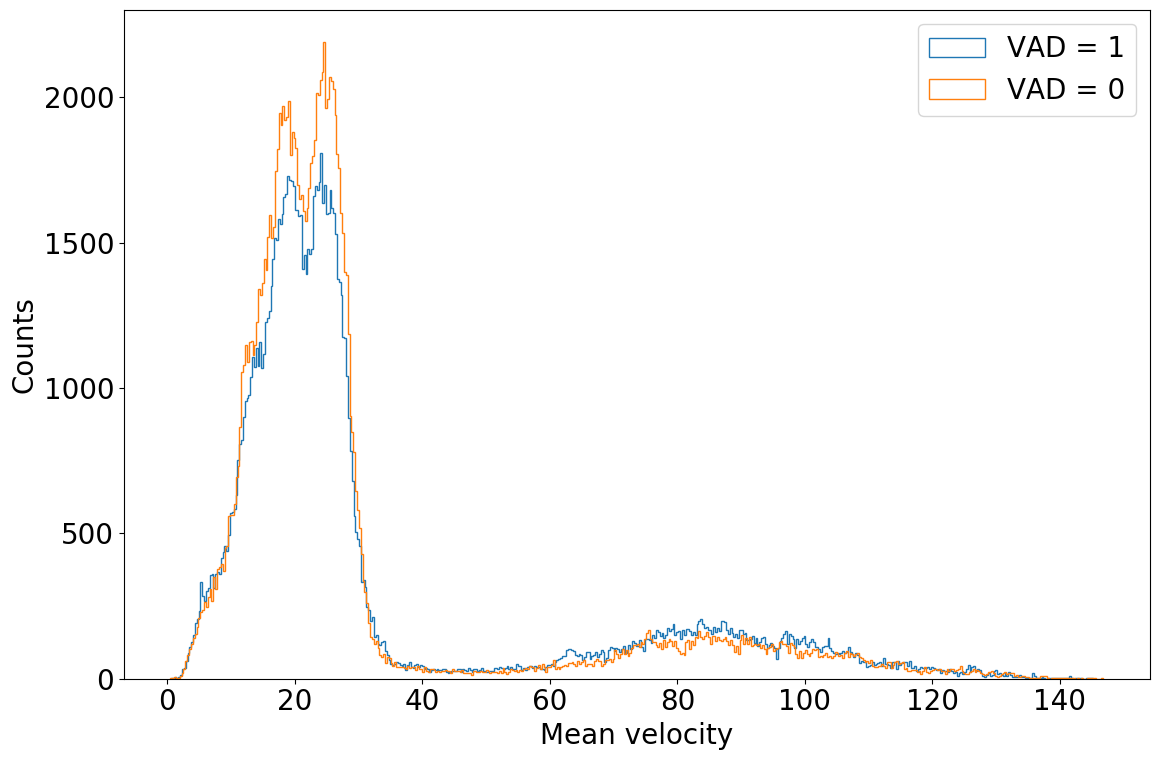

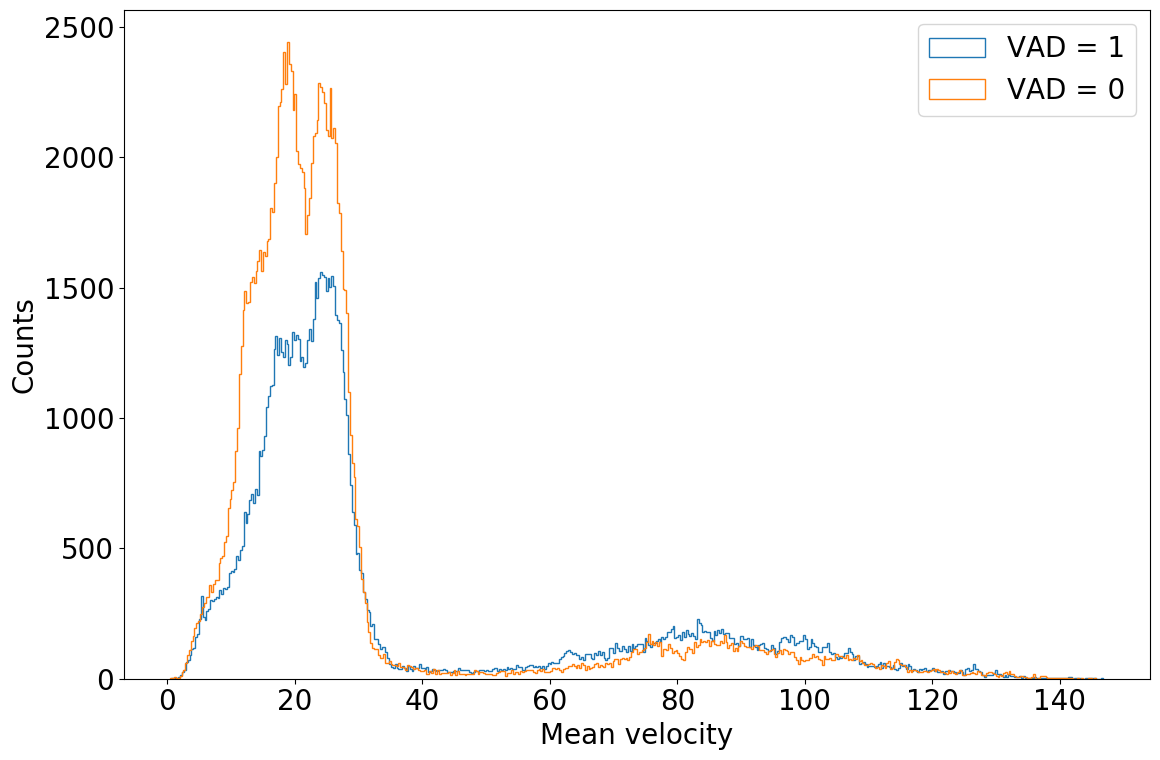

In [137]:
lentotal = len(hist[0])+len(hist[1])+len(hist[2])+len(hist[3])
media = (np.mean(hist[0])*len(hist[0])+np.mean(hist[1])*len(hist[1])+np.mean(hist[2])*len(hist[2])+np.mean(hist[3])*len(hist[3]))/lentotal
fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
n_bins = 500
axs.hist(hist[0], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[1], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

fig, axs = plt.subplots(tight_layout=True, figsize=(12,8))
axs.hist(hist[2], bins=n_bins, label='VAD = 1', histtype='step')
axs.legend()
axs.hist(hist[3], bins=n_bins, label='VAD = 0', histtype='step')
axs.legend()
axs.set_ylabel('Counts')
axs.set_xlabel('Mean velocity')
plt.show()

b_r_shoulder
1823
(1830,)
VAD
233 130
Text VAD
260 103


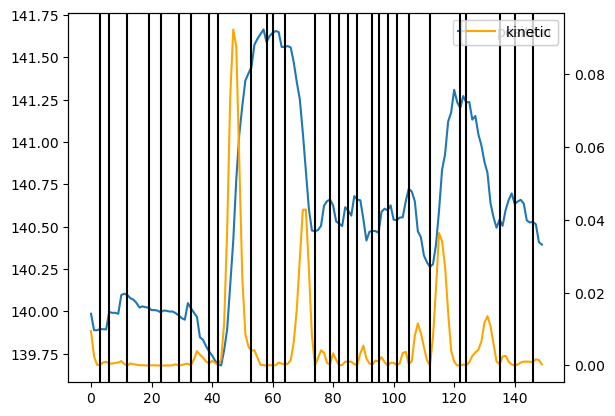

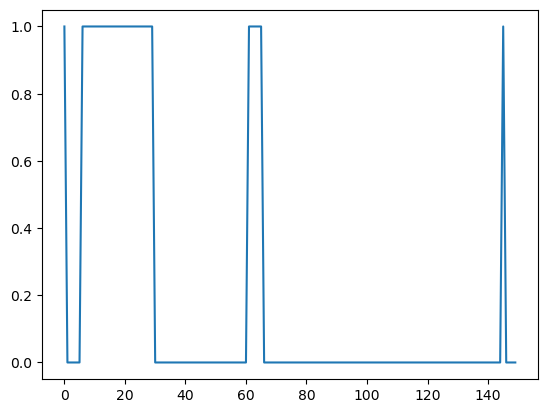

VAD
233
130
TextVAD
260
103


In [213]:
audio, marray, joints, vad, tsv, tvad = getgt(audiogt, motiongt, vadgt, tsvgt)
j = joints['b_r_shoulder']
pos = np.arange(j*9+6,j*9+9)
euclidean_position, kinetic, near_zero_local_mins = motionbeats(marray[:, pos])
fig, ax = plt.subplots()
b, e = 0 , 150
ax.plot(euclidean_position[b:e], label='position')
plt.legend()
ax2 = ax.twinx()
ax2.plot(kinetic[b:e], label='kinetic', color='orange')
for i in near_zero_local_mins:
    if i > b and i < e:
        ax2.axvline(x=i, color='black')
        
plt.legend()
plt.show()

rmsdata = audiorms(audio)
fig, ax = plt.subplots()
ax.plot(vad[b:e])
plt.show()

inside, outside = [], []
for i in near_zero_local_mins:
    if vad[i] == 1:
        inside.append(i)
    else:
        outside.append(i)
print('VAD')
print(len(inside))
print(len(outside))

print('TextVAD')
inside, outside = [], []
for i in near_zero_local_mins:
    if tvad[i] == 1:
        inside.append(i)
    else:
        outside.append(i)
print(len(inside))
print(len(outside))

(1830, 747)
33
33 297 [297 298 299 300 301 302] [303 304 305]
(1830, 3)
(1830,)
(1830,)
(22,)


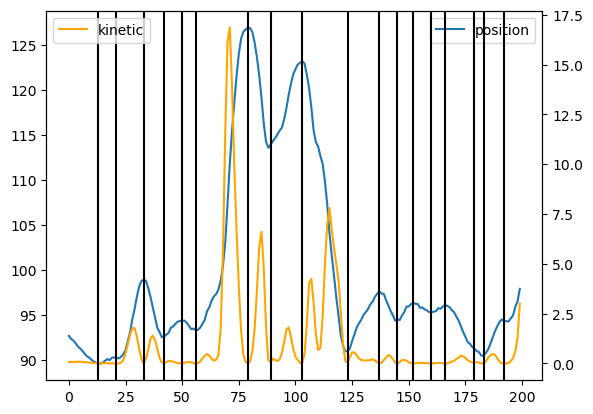

In [72]:
print(marray.shape)
j = joints['b_r_wrist']
print(j)
rot = np.arange(j*9,j*9+6)
pos = np.arange(j*9+6,j*9+9)
print(j, j*9, rot, pos)
#aux = np.sum(np.absolute(marray[:,pos]), axis=-1)
print(marray[:,pos].shape)
aux = np.linalg.norm(marray[:,pos], axis=-1)
print(aux.shape)

fig, ax = plt.subplots()
ax.plot(aux[:200], label='position')
plt.legend()
aux = np.square(savgol_filter(aux, 9, 3, axis=0, deriv=1))
print(aux.shape)
ax2 = ax.twinx()
ax2.plot(aux[:200], label='kinetic', color='orange')

extrem = argrelextrema(aux[:200], np.less)
print(extrem[0].shape)
for i in extrem[0]:
    if aux[i] <= 0.1:
        ax2.axvline(x=i, color='black')

#for i,j in enumerate(aux[:200]):
#    if j<= 0.1:
#        ax2.axvline(x=i, color='black')
plt.legend()
plt.show()

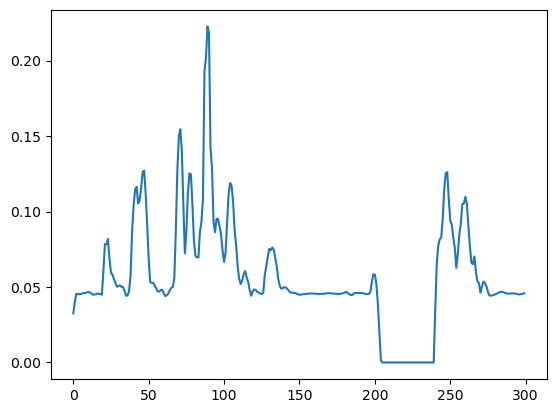

In [41]:
s = 23
plt.plot(result[0,:300])

In [83]:
motiongt = './dataset/Genea2023/val/main-agent/motion_npy_rot6dpos/val_2023_v0_000_main-agent.npy'
vadgt = './dataset/Genea2023/val/main-agent/vad/val_2023_v0_000_main-agent.npy'

In [85]:
marray = np.load(motiongt)
joints = getjoints()
vad = np.load(vadgt)

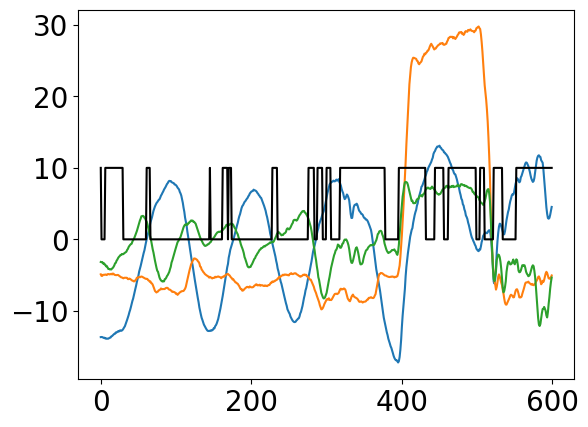

In [99]:
for jointname in joints:
    #print(jointname)
    if jointname == 'b_l_forearm':
        index = joints[jointname]
        pos = np.arange(index*9+6, index*9+9)
        for i in range(3):
            plt.plot(marray[:600,pos[i]] -np.mean(marray[:600,pos[i]] ))
plt.plot(vad[:600]*10, color='black')
#plt.legend()

In [ ]:
for jointname in joints:
    #print(jointname)
    index = joints[jointname]
    pos = np.arange(index*9+6, index*9+9)
    euclidean_position, kinetic, near_zero_local_mins = motionbeats(marray[:,pos])
    joint_in, joint_out, joint_tin, joint_tout = beastandvad(near_zero_local_mins, vad, tvad)

In [55]:
lista = ''
aux = ''
dictionary = ''
for i, j in enumerate(anim.getlistofjoints()):
    lista += ",{}".format(j.name)
    aux += ",{}".format(i)
    dictionary += "\'{}\':{},".format(j.name, i)
#print(lista[1:] + '=' + aux[1:])
print(dictionary)

'body_world':0,'b_root':1,'b_spine0':2,'b_spine1':3,'b_spine2':4,'b_spine3':5,'b_neck0':6,'b_head':7,'b_head_null':8,'b_l_eye':9,'b_r_eye':10,'b_jaw':11,'b_jaw_null':12,'b_teeth':13,'b_tongue0':14,'b_tongue1':15,'b_tongue2':16,'b_tongue3':17,'b_tongue4':18,'b_l_tongue4_1':19,'b_r_tongue4_1':20,'b_l_tongue3_1':21,'b_r_tongue3_1':22,'b_l_tongue2_1':23,'b_r_tongue2_1':24,'b_r_tongue1_1':25,'b_l_tongue1_1':26,'b_r_shoulder':27,'p_r_scap':28,'b_r_arm':29,'b_r_arm_twist':30,'b_r_forearm':31,'b_r_wrist_twist':32,'b_r_wrist':33,'b_r_index1':34,'b_r_index2':35,'b_r_index3':36,'b_r_ring1':37,'b_r_ring2':38,'b_r_ring3':39,'b_r_middle1':40,'b_r_middle2':41,'b_r_middle3':42,'b_r_pinky1':43,'b_r_pinky2':44,'b_r_pinky3':45,'b_r_thumb0':46,'b_r_thumb1':47,'b_r_thumb2':48,'b_r_thumb3':49,'b_l_shoulder':50,'p_l_delt':51,'p_l_scap':52,'b_l_arm':53,'b_l_arm_twist':54,'b_l_forearm':55,'b_l_wrist_twist':56,'b_l_wrist':57,'b_l_thumb0':58,'b_l_thumb1':59,'b_l_thumb2':60,'b_l_thumb3':61,'b_l_index1':62,'b_l_in

In [114]:
anim = bvhsdk.ReadFile(os.path.join(path_default, 'tst_2023_v0_031_main-agent.bvh'))
metric = np.load(os.path.join(path_default, 'metrics/mean.npy'))

In [117]:
print(np.mean(anim.getJoint('b_r_forearm').rotation, axis=0))
print(metric[metric!=0])

[ 11.60189444 -77.63318889  -8.47572222]
[  7.80791541 -56.71737166  -6.34965911 -23.24836051  45.89933837
 -15.07883883]


In [112]:
anim2 = bvhsdk.ReadFile(os.path.join(path_vad, 'tst_2023_v0_031_main-agent.bvh'))

In [113]:
anim2.getJoint('b_r_forearm').rotation

array([[  12.02,  -96.03,  -11.87],
       [  12.6 ,  -91.2 ,  -10.47],
       [  12.29,  -82.49,   -8.76],
       ...,
       [  13.28, -103.8 ,  -13.35],
       [  13.29, -103.67,  -13.32],
       [  13.3 , -103.57,  -13.3 ]])